In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels

In [2]:
billets = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P10\Données/billets.csv", sep = ';')

# 1. Analyse descriptive des données

## 1.1 Consultation rapide

In [3]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
billets.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [5]:
billets.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1364,False,171.69,104.18,104.28,5.62,3.23,110.53
955,True,172.37,104.06,103.69,4.09,2.87,113.68
471,True,172.58,104.17,103.13,4.64,3.17,113.05
26,True,171.83,103.44,103.70,4.15,3.10,113.47
269,True,171.88,103.93,103.72,4.88,3.26,113.11


## 1.2 Structure

In [6]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
billets.dtypes.value_counts()

float64    6
bool       1
dtype: int64

In [8]:
billets.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

## 1.3 Nan & duplicated

In [9]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [10]:
billets.duplicated().sum()

0

Pas de doublon

## 1.4 Inspection des données

In [11]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [12]:
billets.groupby('is_genuine').count()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,500,500,500,492,500,500
True,1000,1000,1000,971,1000,1000


500 billets sont faux et 1000 billets sont vrais. Parmi les vrais billets, 29 ont une marge basse inconnue (8 faux billets).

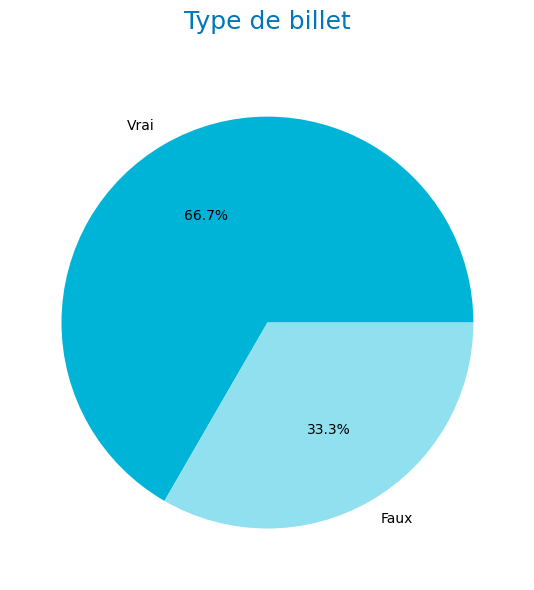

In [13]:
plt.figure(figsize=(10,6))
graph = plt.pie(billets['is_genuine'].value_counts(), labels=['Vrai', 'Faux'], autopct = lambda x: str(round(x, 1)) + '%', colors=['#00b4d8','#90e0ef'])
plt.title("Type de billet\n", fontsize=18, color='#0077b6')
plt.tight_layout()

In [14]:
billets.mean()

is_genuine        0.666667
diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.485967
margin_up         3.151473
length          112.678500
dtype: float64

In [15]:
billets.groupby('is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,5.215935,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.116097,3.05213,113.20243


Plus de 1 mm de différence entre vrai et faux billets sur la moyenne des marges basses et des longueurs.

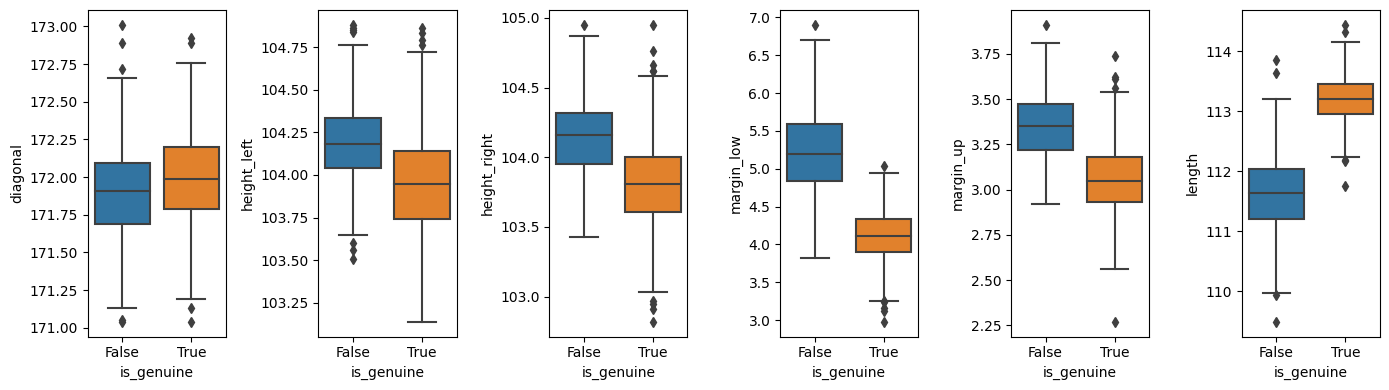

In [16]:
names = billets.columns.drop('is_genuine')

ncols = len(names)
fig, axes = plt.subplots(1,ncols,figsize=(14, 4))

for name,ax in zip(names, axes.flatten()) :
    sns.boxplot(y=name, x='is_genuine', data= billets, orient = 'v', ax=ax)

plt.tight_layout()

De grandes disparités de dispersion entre type de billet sur deux éléments : marge basse et longueur.

In [17]:
billets.groupby('is_genuine').std()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
True,0.300441,0.300231,0.291570,0.319124,0.186340,0.359552


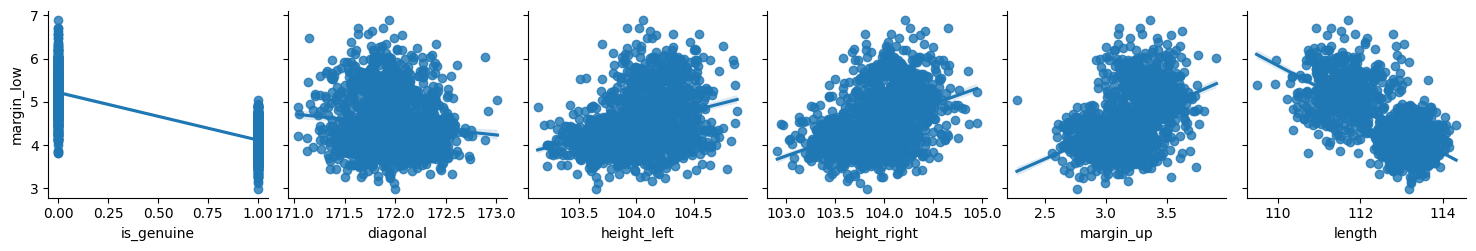

In [18]:
sns.pairplot(billets, x_vars=['is_genuine','diagonal','height_left','height_right','margin_up','length'], y_vars='margin_low', kind='reg')

plt.show()

# 2. Normalisation des données

Bien que toutes les données (hors booléen) sont exprimées en mm, nous constatons différents ordres de grandeur. Nous allons alors procéder à la mise à l'échelle des données. 

In [19]:
billets_dimensions = billets.drop(columns = 'is_genuine')
billets_manq = billets.loc[billets['margin_low'].isnull(), :]
billets1 = billets.dropna()
billets_scaling = billets.drop(columns = 'margin_low')
margin_low = billets['margin_low']

In [20]:
# préparation des données pour la normalisation
X = billets_scaling.values
names = billets_scaling.index
features = billets_scaling.columns

## 2.1 Distribution des données

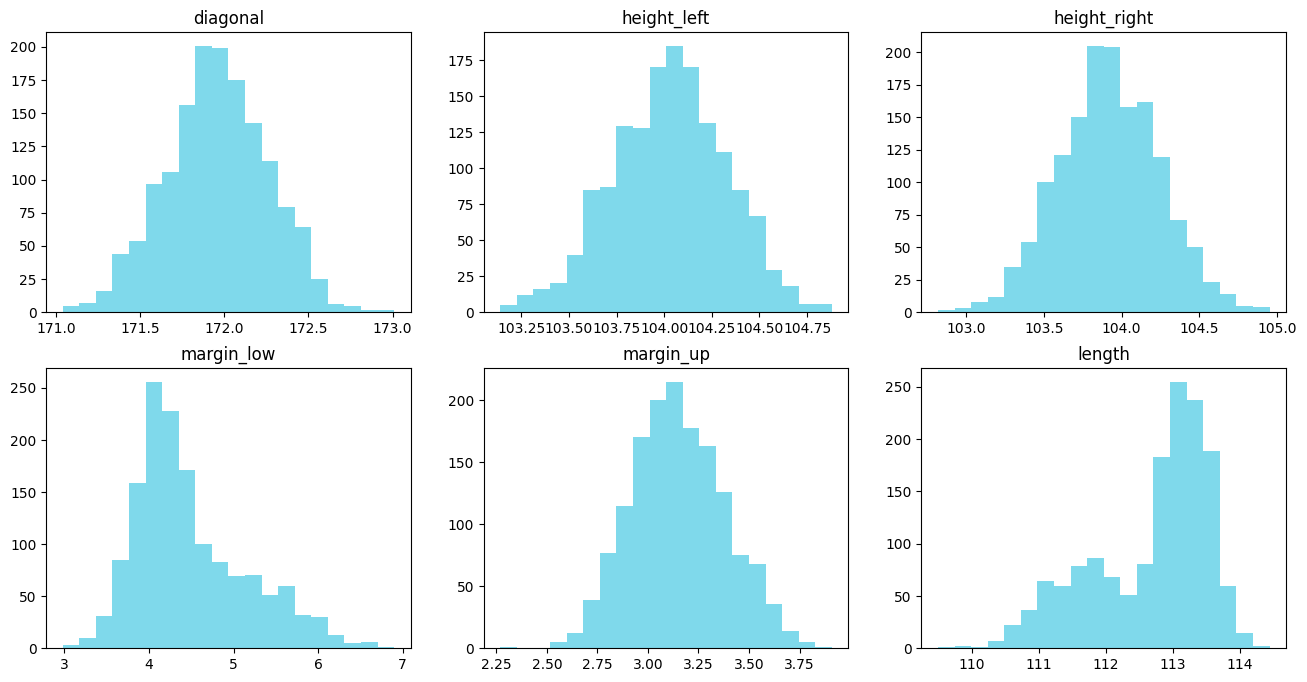

In [21]:
# Histogramme de variables
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))

ax1.hist(billets['diagonal'],bins=20, color='#00b4d8', alpha =0.5)
ax1.set_title("diagonal")
ax2.hist(billets['height_left'],bins=20, color='#00b4d8', alpha =0.5)
ax2.set_title("height_left")
ax3.hist(billets['height_right'],bins=20, color='#00b4d8', alpha =0.5)
ax3.set_title("height_right")
ax4.hist(billets['margin_low'],bins=20, color='#00b4d8', alpha =0.5)
ax4.set_title("margin_low")
ax5.hist(billets['margin_up'],bins=20, color='#00b4d8', alpha =0.5)
ax5.set_title("margin_up")
ax6.hist(billets['length'],bins=20, color='#00b4d8', alpha =0.5)
ax6.set_title("length")
plt.show()

In [22]:
# Calcul de l'asymétrie des variables

skewness = []
variables = billets_dimensions.columns.values.tolist()

for i in billets_dimensions :
    skew0 = billets_dimensions[i].skew()
    skewness.append(skew0)

In [23]:
data_skew=pd.DataFrame({'Variables':variables,'Skewness':skewness})
data_skew1 = data_skew.sort_values('Skewness')

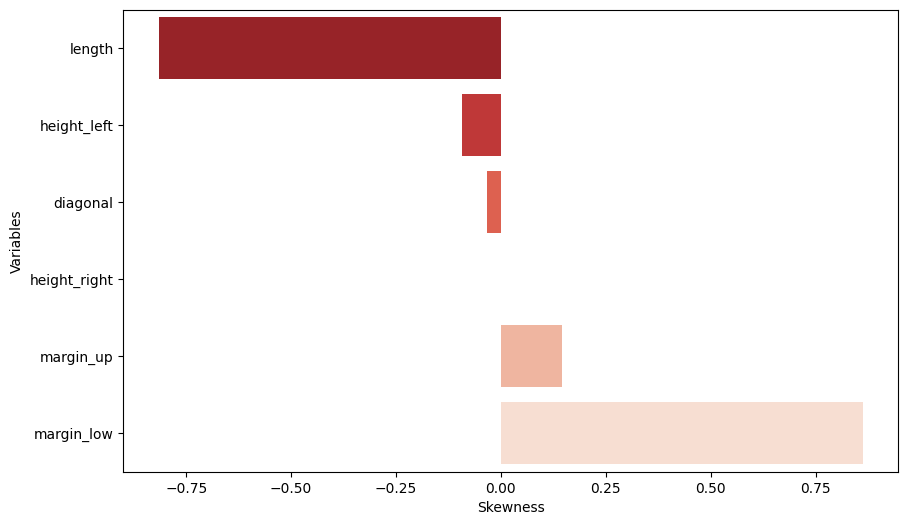

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_skew1['Skewness'], y=data_skew1['Variables'], palette="Reds_r")
plt.show()

Le skewness des 6 variables de dimension est compris entre -1 et 1.  
La distribution des données suit majoritairement une loi normale.

## 2.2 Mise à l'échelle des données

Standard Scaler aide à obtenir une distribution standardisée, avec une moyenne nulle et un écart type de un (variance unitaire). Il normalise en soustrayant la valeur moyenne, puis en divisant le résultat par l'écart type.

La distribution de nos données étant proche de la loi normale, l'utilisation de StandardScaler parait ici adaptée.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Mise à l'échelle des données
scaler = StandardScaler()
standard_scale = scaler.fit(X)
X_scaled = standard_scale.transform(X)

In [27]:
billets_scale = pd.DataFrame(data = X_scaled, index = names, columns = features)

In [28]:
billets_scaleX = billets_scale.join(margin_low)

# 3. Traitement des valeurs manquantes

In [29]:
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Nous constatons que 37 billets ont une valeur 'margin_low' inconnue. Nous allons estimer ces valeurs par regression linéaire.

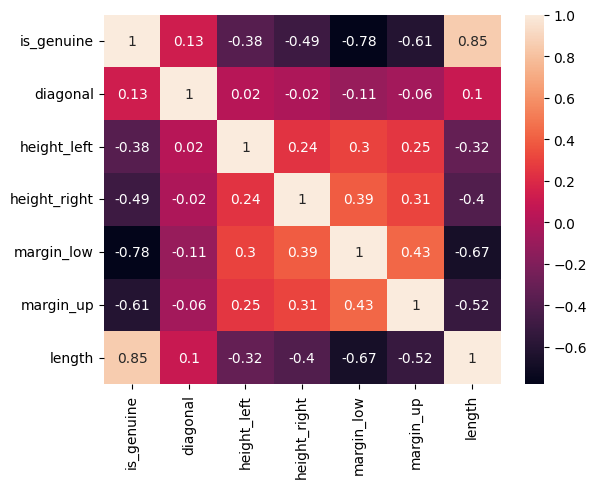

In [30]:
# Matrice de corrélation

correlation_matrix = billets.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

'margin_low' a une forte correlation négative avec 'is_genuine' et 'lenght' et une correlation positive avec 'margin_up'  

NB : il est important d'observer la corrélation entre les features à sélectionner dans notre modèle de regression. Dans notre cas, 'lenght' et 'is_genuine' sont fortement corrélées (0.85). Il pourrait être préférable de ne pas sélectionner ensemble ces deux variables dans notre modèle.  

La corrélation est une mesure qui permet d'évaluer la dépendance seulement **linéaire** entre deux variables aléatoires.

## 3.1 Regression linéaire multiple

### 3.1.1 Modèle de régression linéaire

In [31]:
# Variable à expliquer = margin_low
# niveau de test alpha = 0.05

In [32]:
reg_multi0 = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_scaleX).fit()
print(reg_multi0.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          4.75e-299
Time:                        13:51:54   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4828      0.011    416.437   

Certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %. Nous allons donc retirer par la suite les variables non significatives une à une, jusqu'à ce que p-valeur < 0.05 pour tous les paramètres.

In [33]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_scaleX).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.24e-304
Time:                        13:51:54   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4829      0.011    416.848      0.0

### 3.1.2 Analyse des indicateurs du modèle

In [34]:
# Coefficient de détermination (𝑅2 ou R-squared)

Le score R² explique dans quelle mesure la variance totale de la variable dépendante peut être réduite en utilisant la régression des moindres carrés.

Le coefficient de détermination (𝑅2) est de 0.617 et le 𝑅2 ajusté est de 0.616. Ainsi, l’erreur de prévision est réduite d’environ 62% en utilisant la régression (par rapport à l'utilisation de la moyenne des valeurs observées comme valeur prédite).

In [35]:
# Prob (F-statistic)

Prob (F-statistic) est inférieur à 0,05 : il y a au moins une des deux variables significativement liée à la variable 'margin_low'.

In [36]:
# Log-Likelihood

La valeur de log-vraisemblance est une mesure de l'ajustement du modèle avec les données. Plus cette valeur est élevée, plus le modèle s'ajuste aux données.

In [37]:
# AIC (Critère d'Akaike) et BIC (Critère de Schwarz)

Sont des critères de robustesse du modèle (compromis entre l'ajustement du modèle -on privilégie une faible variance résiduelle- et la parcimonie du modèle -on privilégie alors un faible nombre de variables explicatives-). L'objectif est de minimiser ces valeurs. Nous constatons que AIC et BIC du dernier modèle choisi sont moins élevés que dans le premier modèle (moins de variables explicatives sélectionnées).

In [38]:
# Omnibus

Omnibus décrit la normalité de la distribution des résidus en utilisant le skew et le kurtosis comme mesures. Un 0 indiquerait une normalité parfaite. Dans notre modèle prob(Omnibus) est de 0,0, il y a donc 0% de chances que les résidus soient normalement distribués. Ainsi, nous pouvons questionner la robustesse du modèle.  
En effet, si skew est très proche de 0 (=0.057), ce qui indique symétrie, kurtosis est supérieur à 3 (= 3.79). La distribution est donc étroite.

In [39]:
# Durbin-Watson

fournit une mesure de l'autocorrélation des résidus. La valeur de notre modèle (2.041) est proche de la valeur idéale d'absence d'autocorrélation (2).

In [40]:
# Jarque-Béra

Similaire à Ominibus.  
H0 = les données suivent une loi normale.  
H1 = les données ne suivent pas une loi normale.  
Prob(JB) < 0.05 donc on rejette l'hypothèse de normalité au niveau de test 5%.

Nous pouvons également faire un test de Shapiro-Wilk :

In [41]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

Comme pour les autres tests, l'hypothèse de normalité est remise en cause (p-value < 0.05).

Néanmoins, l'observation des résidus (distribution symétrique) et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

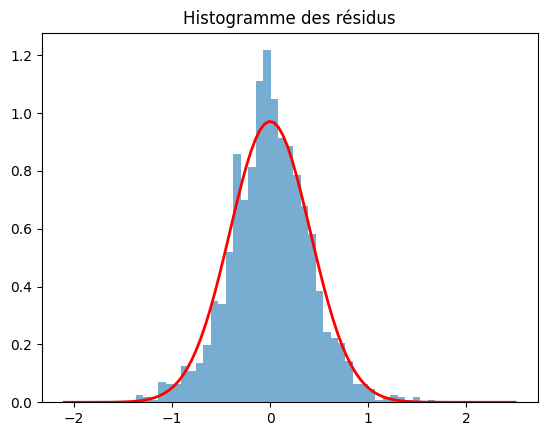

In [42]:
from scipy.stats import norm
import statistics

# Histogramme des résidus et projection loi normale
mu, std = norm.fit(reg_multi.resid) 

x = np.linspace(-2.1, 2.5, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, linewidth=2, color = 'r')
plt.hist(reg_multi.resid, bins= 40,density=True, alpha=0.6)
plt.title('Histogramme des résidus')
plt.show()

In [43]:
# Cond. No.

Un résultat élevé indique qu'il existe une multicolinéarité possible dans l'ensemble de données, ce qui n'est pas le cas ici (=2.03).

In [44]:
# VIF

La colinéarité des variables peut également être détectée à l'aide des indicateurs VIF et TOL

In [45]:
variables1 = reg_multi.model.exog
[variance_inflation_factor(variables1, i) for i in np.arange(1,variables1.shape[1])]

[1.5938854494007757, 1.5938854494007746]

Ici, les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

In [46]:
# test Breusch Pagan

Permet d'analyser l'homoscédasticité des résidus. L'homoscédasticité est une caractéristique d'un modèle de régression linéaire qui implique que la variance des erreurs est constante dans le temps.

In [47]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables1)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115840945e-36


La p-value est inférieure à 0.05, on rejette l'hypothèse 𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité). Cela est induit par la présence de la variable 'is_genuine' dans les variables explicatives, dont la distribution n'est pas normale (variable binaire).

## 3.2 Prediction des données manquantes

In [48]:
# Constitution de la base de données manquantes

billets_scale_manq = billets_scaleX.loc[billets_scaleX['margin_low'].isnull(), :]

In [49]:
X1 = billets_scale_manq[['is_genuine','margin_up']]
Y1 = billets_scale_manq[['margin_low']]

In [50]:
# Prédiction des données manquantes
predictions1 = reg_multi.predict(X1)

In [51]:
predictions1

72      4.074248
99      4.097561
151     4.122994
197     3.995830
241     4.122994
251     4.137830
284     4.078487
334     4.127233
410     4.101800
413     4.093322
445     4.125114
481     4.188696
505     4.131472
611     4.063651
654     4.190815
675     4.220487
710     4.112397
739     4.108158
742     4.076367
780     4.099681
798     4.125114
844     4.129352
845     4.148427
871     4.112397
895     4.131472
919     4.216248
945     4.122994
946     4.070009
981     4.129352
1076    5.245925
1121    5.254403
1176    5.286194
1303    5.305269
1315    5.205657
1347    5.161149
1435    5.171746
1438    5.239567
dtype: float64

In [52]:
billets_final = billets.copy()
billets_final.loc[billets['margin_low'].isnull(), 'margin_low'] = predictions1

In [53]:
billets_final.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [54]:
billets_final.loc[billets['margin_low'].isnull(), :]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.074248,3.25,112.79
99,True,171.93,104.07,104.18,4.097561,3.14,113.08
151,True,172.07,103.80,104.38,4.122994,3.02,112.93
197,True,171.45,103.66,103.80,3.995830,3.62,113.27
241,True,171.83,104.14,104.06,4.122994,3.02,112.36
251,True,171.80,103.26,102.82,4.137830,2.95,113.22
284,True,171.92,103.83,103.76,4.078487,3.23,113.29
334,True,171.85,103.70,103.96,4.127233,3.00,113.36
410,True,172.56,103.72,103.51,4.101800,3.12,112.95
413,True,172.30,103.66,103.50,4.093322,3.16,112.95


## 3.3 Analyse des valeurs atypiques et/ou aberrantes

Nous allons ici réaliser les tests à un niveau 𝛼 = 5%  
Récupérons 𝑛, le nombre d'individus de l'échantillon, et 𝑝, le nombre de variables.  
Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses.

In [55]:
alpha = 0.05
n = billets1.shape[0]
p = 3
d = {'obs':np.arange(1, n+1)}
analyses = pd.DataFrame(index = billets1.index, data = d)
#analyses['obs'].astype('float', inplace=True)

### 3.3.1 Atypicité des observations

In [56]:
# Calculer les leviers (variables explicatives)

analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

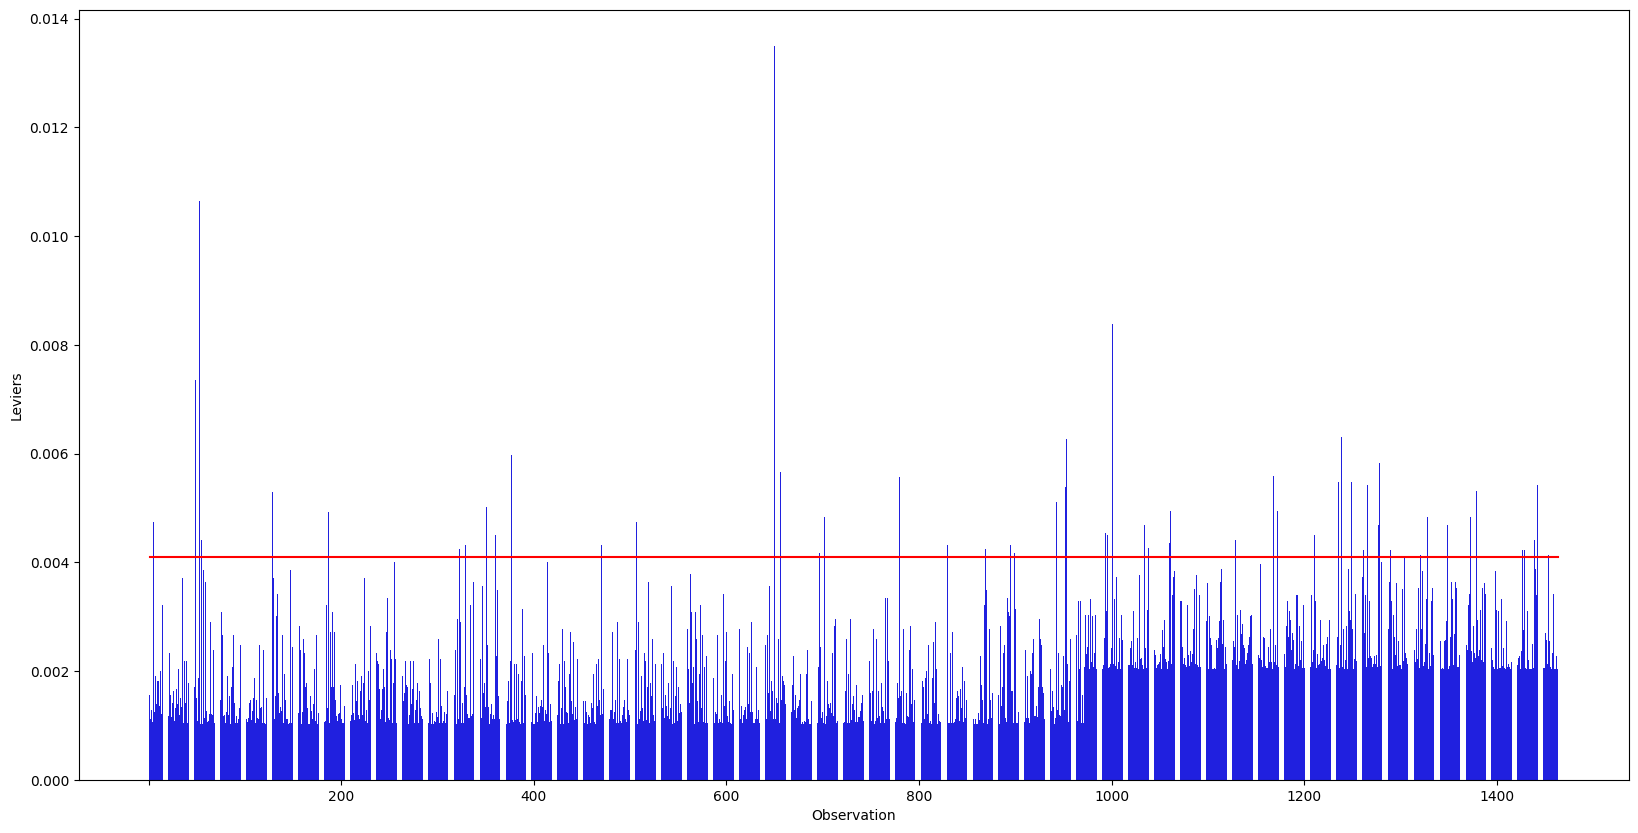

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x = analyses['obs'], y =analyses['levier'], color = 'b')
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.xticks(np.arange(-1, 1463, step=200))
plt.plot([0, 1463],[seuil_levier, seuil_levier], color='r')
plt.show()

In [58]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
48,49,0.007353
52,53,0.010647
54,55,0.004408
125,124,0.005865
...,...,...
1478,1442,0.005428
1479,1443,0.004406
1481,1445,0.004648
1483,1447,0.004796


In [59]:
seuil_levier

0.004101161995898838

Sur les variables explicatives, 67 observations sont considérées comme atypiques

In [60]:
# Calculer les résidus studentisés (variable à expliquer)

In [61]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

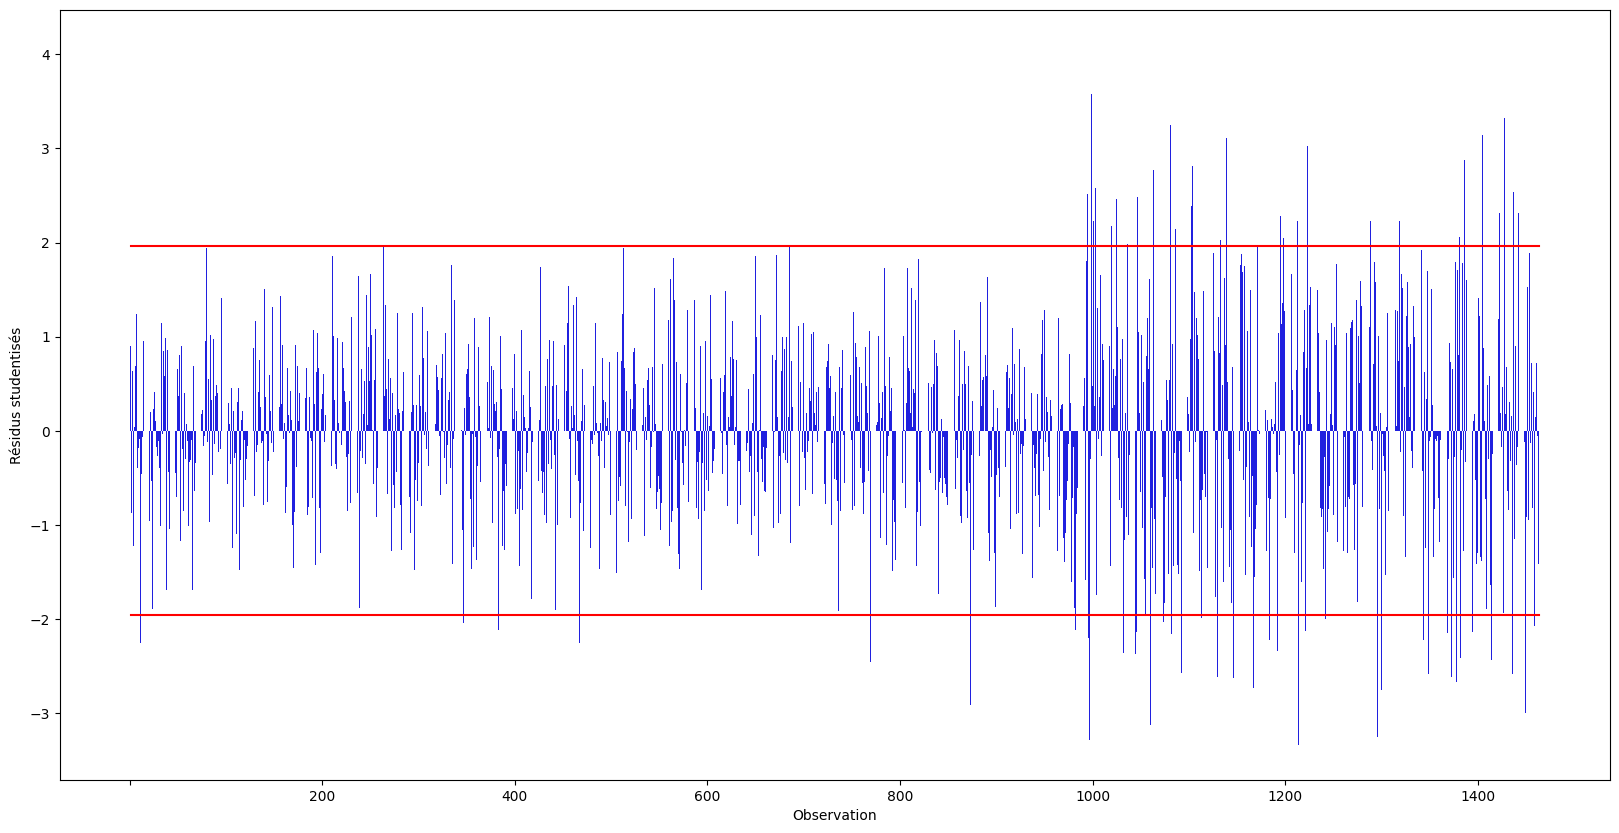

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x = analyses['obs'], y = analyses['rstudent'], color = 'b')
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1463], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.xticks(np.arange(-1, 1463, step=200))
plt.show()

In [63]:
analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

,obs,levier,rstudent
10,11,0.001360,-2.260280
269,264,0.001906,1.965931
354,347,0.003559,-2.047795
390,383,0.001109,-2.114700
477,467,0.002227,-2.257411
...,...,...,...
1473,1437,0.002500,2.536322
1478,1442,0.005428,2.317452
1482,1446,0.002168,-2.709317
1486,1450,0.002053,-2.999746


Sur la variable à expliquer, 80 observations peuvent être considérées comme atypiques

### 3.3.2 Influence des observations

En pratique, on ne retire que les observations atypiques ET influentes

In [64]:
# Calculer la distance de Cook

In [65]:
influence = reg_multi.get_influence().summary_frame()

In [66]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

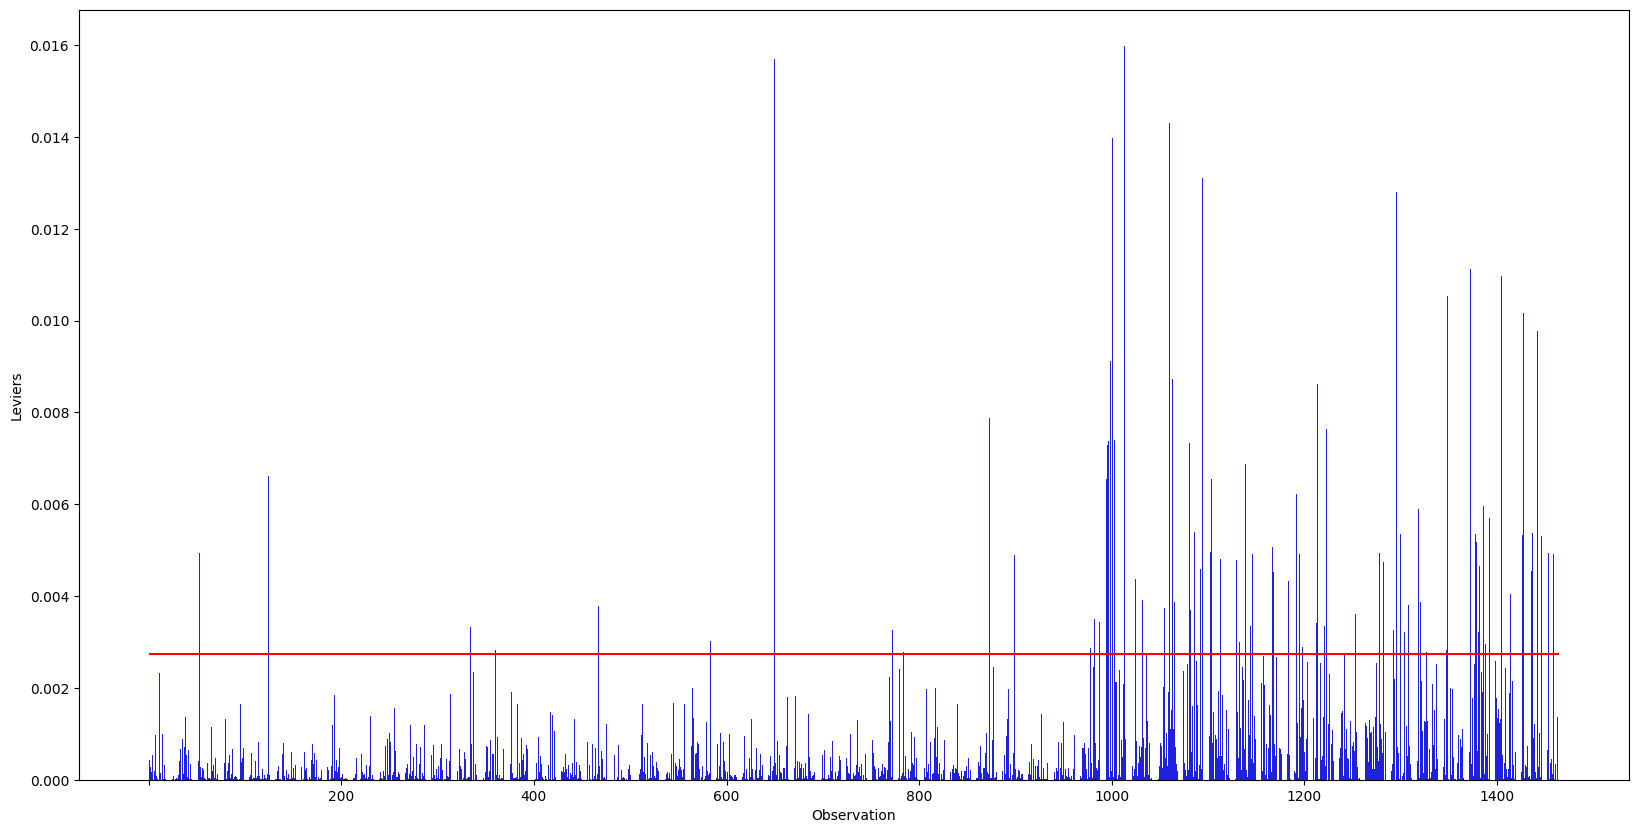

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x = analyses['obs'], y = analyses['dcooks'], color ='b')
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.xticks(np.arange(-1, 1463, step=200))
plt.show()

In [68]:
# Observations influentes

analyses.loc[analyses['dcooks'] > seuil_dcook, :]

,obs,levier,rstudent,dcooks
52,53,0.010647,-1.174185,0.004945
125,124,0.005865,-1.835525,0.006626
239,236,0.004408,1.876758,0.005198
341,334,0.003212,1.761293,0.003332
354,347,0.003559,-2.047795,0.004993
...,...,...,...,...
1478,1442,0.005428,2.317452,0.009770
1482,1446,0.002168,-2.709317,0.005315
1486,1450,0.002053,-2.999746,0.006170
1490,1454,0.004136,1.890304,0.004947


In [69]:
# Observations atypiques ET influentes

atyp_infl = analyses.loc[(analyses['dcooks'] > seuil_dcook) & 
             ((analyses['levier'] > seuil_levier) | 
              ((analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent))), :]

atyp_infl

,obs,levier,rstudent,dcooks
52,53,0.010647,-1.174185,0.004945
125,124,0.005865,-1.835525,0.006626
239,236,0.004408,1.876758,0.005198
354,347,0.003559,-2.047795,0.004993
367,360,0.004493,-1.373118,0.002837
...,...,...,...,...
1478,1442,0.005428,2.317452,0.009770
1482,1446,0.002168,-2.709317,0.005315
1486,1450,0.002053,-2.999746,0.006170
1490,1454,0.004136,1.890304,0.004947


In [70]:
list_atypinfl = atyp_infl.index

In [71]:
billets_atypinfl = billets_final.loc[billets_final.index.isin(list_atypinfl), :]
billets_atypinfl

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
52,True,171.64,104.18,103.78,3.49,3.74,113.94
125,True,171.50,104.03,103.97,3.26,3.54,113.24
239,True,171.85,104.07,103.90,4.80,3.46,113.73
354,True,171.96,104.18,104.14,3.35,2.70,113.56
367,True,171.73,104.17,104.02,3.64,2.64,112.72
...,...,...,...,...,...,...,...
1478,False,172.36,103.93,104.00,6.08,3.76,112.89
1482,False,172.30,104.04,103.85,4.12,3.27,111.69
1486,False,172.47,104.16,103.85,3.99,3.32,111.25
1490,False,171.82,104.32,104.05,6.06,3.03,111.68


In [72]:
billets_atypinfl.loc[billets_atypinfl['is_genuine'] == 1, :]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
52,True,171.64,104.18,103.78,3.49,3.74,113.94
125,True,171.50,104.03,103.97,3.26,3.54,113.24
239,True,171.85,104.07,103.90,4.80,3.46,113.73
354,True,171.96,104.18,104.14,3.35,2.70,113.56
367,True,171.73,104.17,104.02,3.64,2.64,112.72
477,True,171.95,104.25,103.64,3.24,2.81,113.42
571,True,171.95,103.76,103.99,3.25,2.78,113.20
664,True,172.05,103.70,103.75,5.04,2.27,113.55
791,True,171.82,103.67,103.80,4.60,3.49,113.32
897,True,172.00,103.65,103.83,2.98,2.76,113.17


Au regard de notre modèle, la plupart des observations atypiques et influentes sont des faux billets.

In [73]:
billets.loc[billets['margin_low'].isnull(), 'is_genuine'].value_counts()

True     29
False     8
Name: is_genuine, dtype: int64

In [74]:
billets.loc[billets['margin_low'].isnull(), 'is_genuine'].value_counts(normalize=True).round(2)

True     0.78
False    0.22
Name: is_genuine, dtype: float64

78% des billets dont la 'margin_low' est à prédire sont des vrais billets. Je vais donc retirer les valeurs atypiques et influentes afin d'ajuster mon modèle.

In [75]:
# suppression des 86 valeurs atypiques et influentes

billets_scale2 = billets_scaleX.loc[~billets_scaleX.index.isin(list_atypinfl), :]

In [76]:
billets_scale2

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,0.707107,-0.486540,2.774123,3.163240,-1.128325,0.173651,4.52
1,0.707107,-1.633729,-2.236535,-0.799668,-0.696799,0.471666,3.77
2,0.707107,2.397823,1.504756,-1.291191,-0.912562,0.551901,4.40
3,0.707107,-1.961498,-0.399294,0.060498,-0.610494,0.953075,3.62
4,0.707107,-0.748754,0.836669,-1.414072,1.417677,-0.158750,4.04
...,...,...,...,...,...,...,...
1494,-1.414214,-1.273184,0.369007,0.674903,0.338863,-1.052796,5.41
1496,-1.414214,0.758981,2.005822,1.596509,0.942999,-1.958303,5.27
1497,-1.414214,-0.519316,-0.065250,0.613462,0.899846,-0.835016,5.51
1498,-1.414214,0.332882,0.836669,0.429141,1.331372,-0.491152,5.17


In [77]:
reg_multi1 = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_scale2).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     503.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:52:07   Log-Likelihood:                -461.92
No. Observations:                1377   AIC:                             937.8
Df Residuals:                    1370   BIC:                             974.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4842      0.009    489.341   

In [78]:
reg_multi2 = smf.ols('margin_low~is_genuine+margin_up', data=billets_scale2).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1508.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:52:07   Log-Likelihood:                -464.01
No. Observations:                1377   AIC:                             934.0
Df Residuals:                    1374   BIC:                             949.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4841      0.009    489.317      0.0

In [79]:
# Pour rappel

print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.24e-304
Time:                        13:52:07   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4829      0.011    416.848      0.0

Notre nouveau modèle a les effets suivants :  
- R-squared s'élève à 0.687. L’erreur de prévision serait ainsi réduite par rapport au premier modèle de régression retenu (= 0.616.  
- AIC et BIC sont réduits (934 vs 1555 et 950 vs 1571) (meilleur ajustement du modèle - Log-Likelihood + élevé).  
- Kurtosis baisse significativement (=2.629), distribution plus aplatie.
- Prob(JB) > 0.01 donc on ne rejette pas l'hypothèse de normalité des residus au niveau de test 1%.

In [80]:
# test Breusch Pagan
variables2 = reg_multi2.model.exog

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi2.resid, variables2)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 8.423260192752064e-13


Même si l'on constate une amélioration, la p-value est toujours inférieure à 0.05, donc rejet de l'hypothèse de constance des variances des  résidus (donc hétérodasticité) - la variable binaire 'is_genuine' est toujours présente dans notre modèle.
  
Briser l'hypothèse d'homoscédasticité signifie que les estimateurs OLS (Ordinary Least Square) ne sont pas le meilleur estimateur linéaire sans biais et que leur variance n’est pas la plus faible de tous les autres estimateurs sans biais.  
Malgré ce constat, je confirme ce modèle pour l'estimation du 'margin_low' des billets.

### 3.3.3 Prédiction des valeurs manquantes ajustées

In [81]:
# Prédiction des données manquantes (normalisées)

X2 = billets_scale_manq[['is_genuine','margin_up']]
Y2 = billets_scale_manq[['margin_low']]

predictions2 = reg_multi2.predict(X2)

In [82]:
predictions2

72      4.078717
99      4.102066
151     4.127538
197     4.000179
241     4.127538
251     4.142396
284     4.082962
334     4.131783
410     4.106311
413     4.097821
445     4.129660
481     4.193340
505     4.136028
611     4.068103
654     4.195462
675     4.225179
710     4.116924
739     4.112679
742     4.080839
780     4.104188
798     4.129660
844     4.133906
845     4.153009
871     4.116924
895     4.136028
919     4.220934
945     4.127538
946     4.074471
981     4.133906
1076    5.240654
1121    5.249145
1176    5.280984
1303    5.300088
1315    5.200324
1347    5.155748
1435    5.166361
1438    5.234286
dtype: float64

In [83]:
billets_scale3 = billets_scaleX.copy()

In [84]:
billets_scale3.loc[billets_scale3['margin_low'].isnull(), 'margin_low'] = predictions2

In [85]:
billets_final1 = billets.copy()
billets_final1.loc[billets_final1['margin_low'].isnull(), 'margin_low'] = predictions2

### 3.3.4 Comparaison de l'ajustement des modèles

#### Sur la base de données globale des billets (1463 billets)

In [86]:
billets_scale4 = billets_scale3.copy()

In [87]:
X3 = billets_scaleX[['is_genuine','margin_up']]
Y3 = billets_scaleX[['margin_low']]

In [88]:
predictions3 = reg_multi.predict(X3)
predictions4 = reg_multi2.predict(X3)

In [89]:
Predict1 = pd.DataFrame({'is_genuine' : billets['is_genuine'], 'margin_low' : billets_scaleX['margin_low'], 'predict' : predictions3, 'predict2' : predictions4})

In [90]:
Predict1.dropna(inplace=True)

In [91]:
# carrés des résidus
Predict1['sr'] = (Predict1['margin_low'] - Predict1['predict'])**2
Predict1['sr2'] = (Predict1['margin_low'] - Predict1['predict2'])**2

# carrés totaux
Predict1['st'] = (Predict1['margin_low'] - Predict1['margin_low'].mean())**2

In [92]:
Predict1.sum()

is_genuine     971.000000
margin_low    6562.970000
predict       6562.970000
predict2      6564.755411
sr             247.018322
sr2            247.052189
st             644.226206
dtype: float64

In [93]:
Predict1.groupby('is_genuine').sum()

,margin_low,predict,predict2,sr,sr2,st
is_genuine,,,,,,
False,2566.24,2566.24,2563.623959,148.206951,148.218530,412.604518
True,3996.73,3996.73,4001.131452,98.811371,98.833659,231.621688


#### Sur la base de données des billets non atypiques et non influents

In [94]:
billets_scale5 = billets_scale2.copy()

In [95]:
billets2 = billets.loc[~billets.index.isin(list_atypinfl), :]

In [96]:
X4 = billets_scale5[['is_genuine','margin_up']]
Y4 = billets_scale5[['margin_low']]

In [97]:
predictions5 = reg_multi.predict(X4)
predictions6 = reg_multi2.predict(X4)

In [98]:
Predict2 = pd.DataFrame({'is_genuine' : billets2['is_genuine'], 'margin_low' : billets_scale2['margin_low'], 'predict' : predictions5, 'predict2' : predictions6})

In [99]:
# carrés des résidus
Predict2['sr'] = (Predict2['margin_low'] - Predict2['predict'])**2
Predict2['sr2'] = (Predict2['margin_low'] - Predict2['predict2'])**2

# carrés totaux
Predict2['st'] = (Predict2['margin_low'] - Predict2['margin_low'].mean())**2

In [100]:
Predict2.dropna(inplace=True)

In [101]:
Predict2.sum()

is_genuine     960.000000
margin_low    6128.390000
predict       6126.256034
predict2      6128.390000
sr             158.210685
sr2            158.179166
st             505.494002
dtype: float64

In [102]:
Predict2.groupby('is_genuine').sum()

,margin_low,predict,predict2,sr,sr2,st
is_genuine,,,,,,
False,2172.74,2174.957388,2172.74,66.462775,66.449251,308.913012
True,3955.65,3951.298646,3955.65,91.747910,91.729915,196.580990


Le premier modèle est plus ajusté sur la base globale des billets tandis que le second modèle est plus ajusté sur les données non atypiques et non influentes

# 4. Algorithme k-means

In [103]:
dimensions_billets = billets_final1.drop(columns = "is_genuine")

# Préparation des données
XXX = dimensions_billets.values
namesXXX = dimensions_billets.index
featuresXXX = dimensions_billets.columns

# Standardisation de X
standard_scale = scaler.fit(XXX)
XXX_scaled = standard_scale.transform(XXX)

In [104]:
from matplotlib.collections import LineCollection

# Fonctions pour affichage des graphiques

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

## 4.1 Analyse en Composantes Principales

In [105]:
# Calcul des composantes principales
n_comp = 6
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XXX_scaled)

PCA(n_components=6)

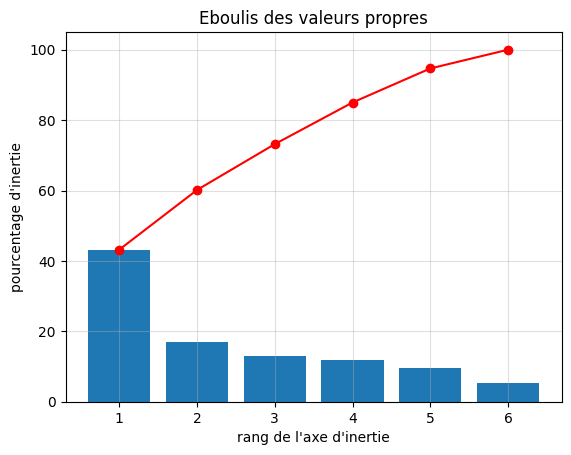

In [106]:
# Eboulis des valeurs propres
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.grid(alpha=0.4)
plt.show(block=False)

In [107]:
print(pca.explained_variance_ratio_.cumsum())

[0.43203549 0.60160772 0.73180856 0.85006045 0.94673443 1.        ]


La première composante principale explique 43% de la variance totale, les 2 premières composantes près de 60%.

Point important : l'ACP est très sensible aux outliers (parfois un axe d'inertie n'est dû qu'à un groupe d'individus). Un individu situé très loin des autres à tendance à attirer certains axes d'inertie.

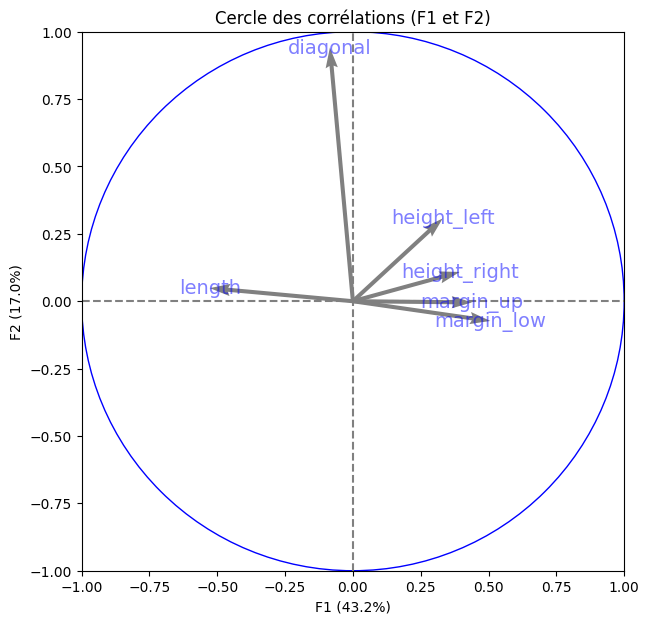

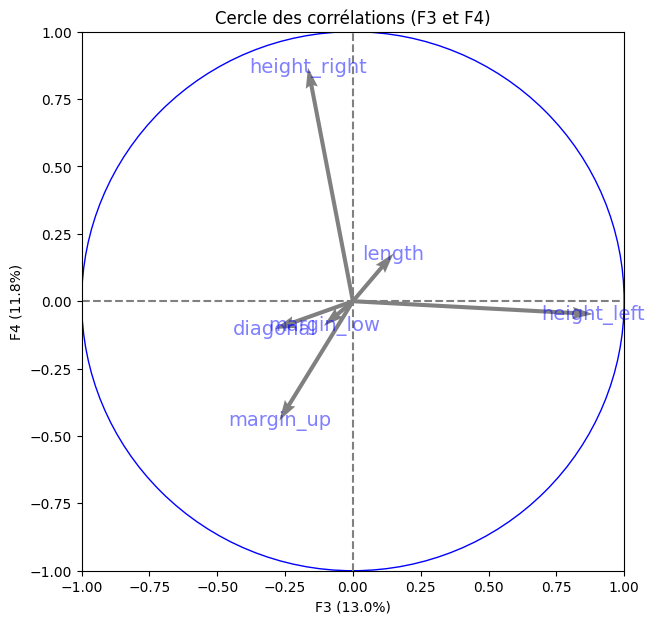

In [108]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(featuresXXX))
plt.show()

**F1**(43.2% de l'inertie)

In [109]:
f1 = pca.components_[0]
(pd.DataFrame({'variable' : featuresXXX, 'contribution' : f1})).sort_values(by='contribution')

,variable,contribution
5,length,-0.527592
0,diagonal,-0.084847
1,height_left,0.331326
2,height_right,0.393768
4,margin_up,0.439326
3,margin_low,0.506566


Les variables les plus corrélées négativement à F1 sont :    
- lenght  

Les variables les plus corrélées positivement à F1 sont :  
- margin_low  
- margin_up
- height_right
- height_left

Les composantes principales suivantes sont centrées sur une seule dimension (par exemple, diagonal pour F2)

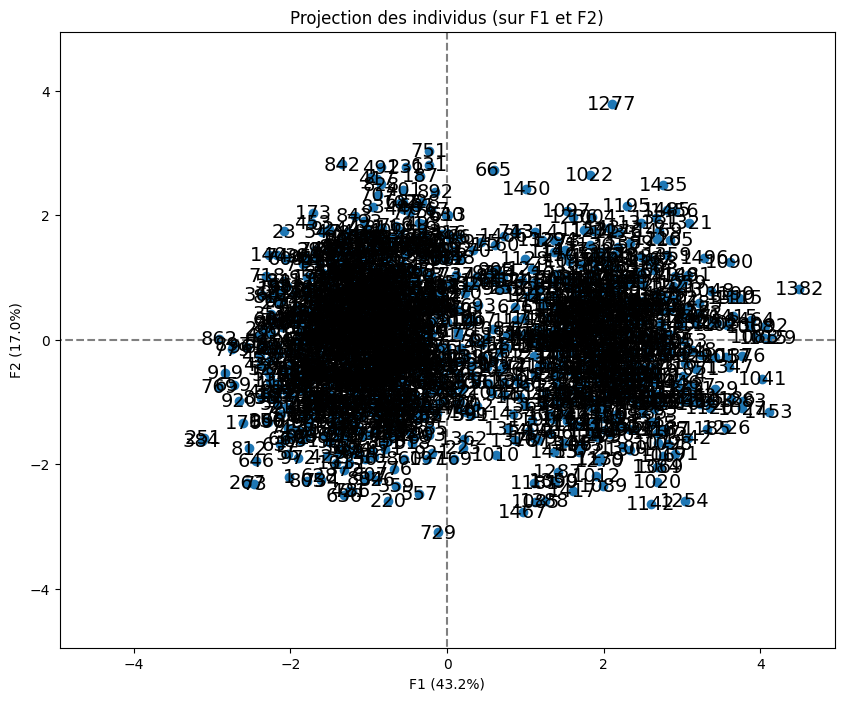

In [110]:
# Projection des individus sur le premier plan factoriel
XXX_projected = pca.transform(XXX_scaled)
display_factorial_planes(XXX_projected, n_comp, pca, [(0,1)], labels = np.array(namesXXX))

plt.show()

Sur cette représentation, nous repérons deux groupes assez distincts, qui semblent correspondre à la véracité du billet.

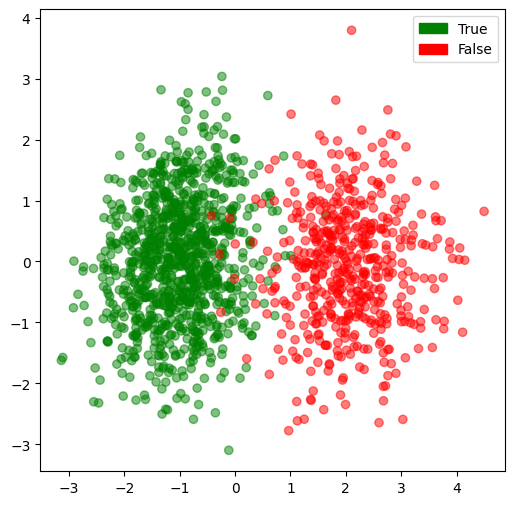

In [111]:
import matplotlib.patches as mpatches

# afficher chaque observation en fonction de la qualité du billet
colors = ['red','green']

dataPointColor=[]
for row in billets_final1.is_genuine :
    dataPointColor.append(colors[row])


plt.figure(figsize=(6,6))
green_patch0 = mpatches.Patch(color='green', label='True')
red_patch0 = mpatches.Patch(color='red', label='False')

plt.scatter(XXX_projected[:, 0], XXX_projected[:, 1],
    # colorer en utilisant la variable 'is_genuine'
    c=dataPointColor, alpha=.5)

plt.legend(handles=[green_patch0, red_patch0])
plt.show()

- les billets ayant une longueur élevée correspondent le plus souvent à des vrai billets
- les billets avec des valeurs plus élevées sur : marge basse, marge haute, hauteur droite et hauteur gauche correspondraient à des faux billets

## 4.2 Clustering K-means

### 4.2.1 Train test split

In [112]:
from sklearn.model_selection import train_test_split

# Préparation des données
dimensions = ['diagonal','height_left','height_right','margin_low', 'margin_up','length']
X = billets_final1.loc[:, dimensions]
y = billets_final1['is_genuine']

# Fractionnement des données
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .8, shuffle=True, stratify = y)

In [113]:
scaler = StandardScaler()

In [114]:
# Standardisation des données
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### 4.2.2 Application du k-means à nos données d'entrainement

In [115]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans

# Nombre de clusters souhaités
n_clust = 2

# Clustering par K-means
km = KMeans(n_clusters=n_clust, init = 'k-means++',n_init = 100)
model = km.fit(X_train_scale, y_train)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

C:\Users\kant_\anaconda3\envs\Quentin\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [116]:
# Projection des individus constituant X_train sur le premier plan factoriel
X0_projected = pca.transform(X_train_scale)

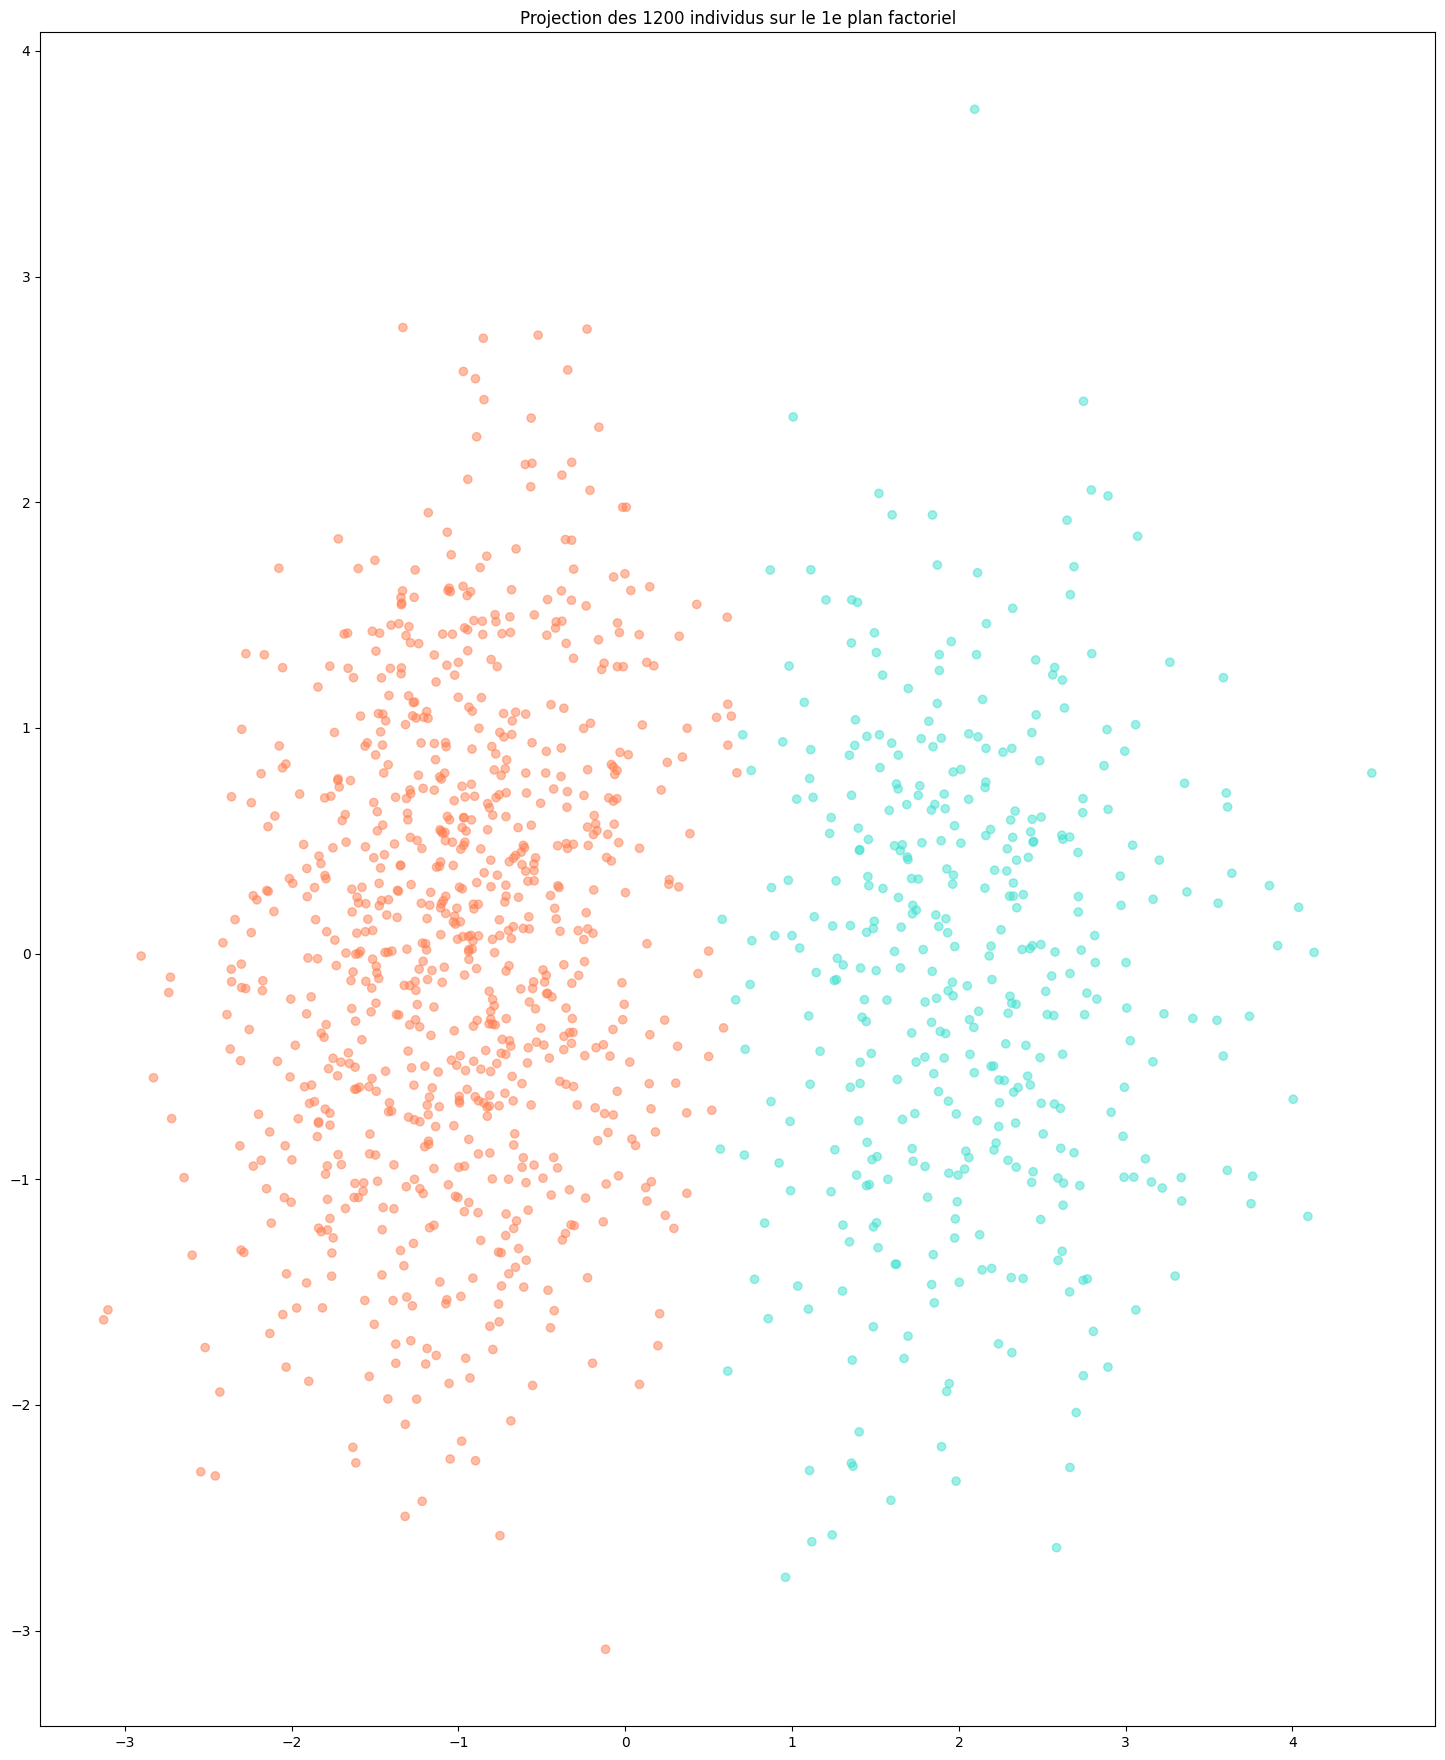

In [117]:
# Attribution des couleurs
colors = ['turquoise','coral']
centroidColor= []
for item in range(n_clust):
    centroidColor.append(colors[item])

dataPointColor1=[]
for row in clusters:
    dataPointColor1.append(colors[row])

# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.figure(figsize=(18,22))
plt.scatter(X0_projected[:, 0], X0_projected[:, 1], c=dataPointColor1, alpha=.5)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X0_projected.shape[0]))

plt.show(block=False)

### 4.2.3 Projection des centroides

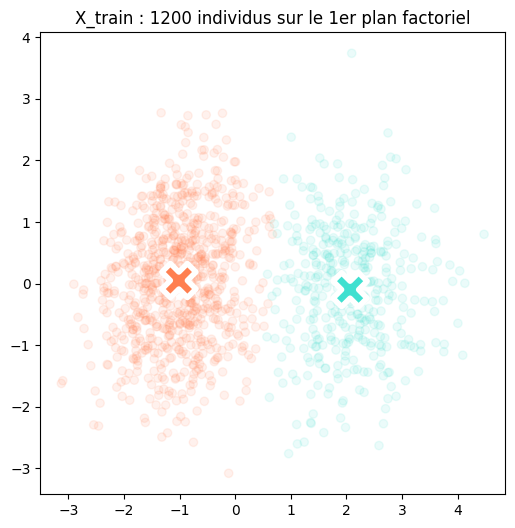

In [118]:
# Position des centres de classes
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)

# Projection

plt.figure(figsize =(6, 6))

plt.scatter(X0_projected[:, 0], X0_projected[:, 1], c=dataPointColor1, alpha=0.1)
plt.title("X_train : {} individus sur le 1er plan factoriel".format(X0_projected.shape[0]))
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],s=600,c=centroidColor,marker="X",edgecolors=['white','white'], linewidths=4)

plt.show(block=False)

### 4.2.4 Prédictions et évaluation

In [119]:
from sklearn.metrics import accuracy_score

# Predictions de X_test
yhat = model.predict(X_test_scale)

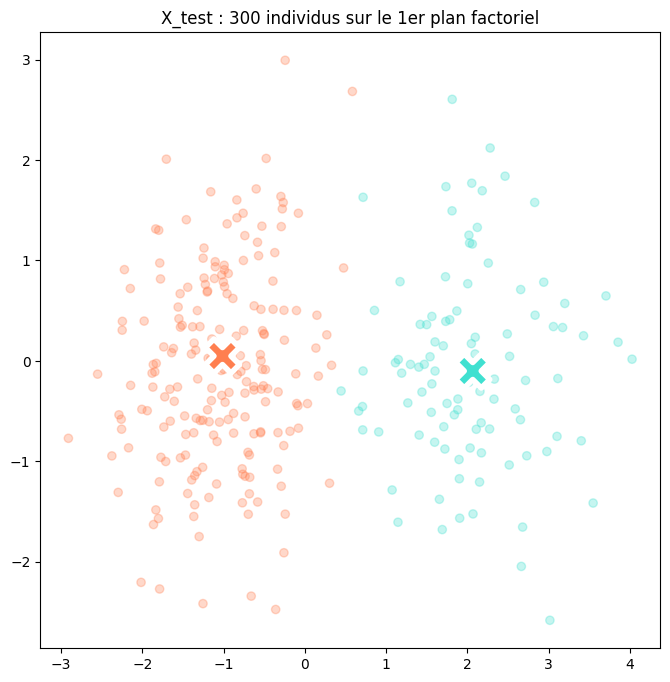

In [120]:
# Projection des individus constituant X_test sur le premier plan factoriel
X1_projected = pca.transform(X_test_scale)

# Attribution des couleurs
colors = ['turquoise','coral']

dataPointColor2=[]
for row in yhat :
    dataPointColor2.append(colors[row])
    
# Affichage du clustering par projection X_test sur le premier plan factoriel
plt.figure(figsize =(8, 8))

plt.scatter(X1_projected[:, 0], X1_projected[:, 1], c=dataPointColor2, alpha=0.3)
plt.title("X_test : {} individus sur le 1er plan factoriel".format(X1_projected.shape[0]))
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],s=600,c=centroidColor,marker="X",edgecolors=['white','white'], linewidths=4)

plt.show()

In [121]:
# Evaluation des predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
print("Accuracy (train) : %0.1f%% " % (acc * 100))

Accuracy: 0.987
Accuracy (train) : 98.7% 


In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



**Accuracy** :  Fraction des prédictions correctes de l'algorithme  
    = Nombre de prédictions correctes / Nombre total de prédictions   
        (TP + TN)/(TP + FP + FN + TN)

**Precision** : Fraction des prédictions positives correctes / total des prédictions positives (ex : sur le total des billets prédits comme faux, 98% le sont vraiment)  
**Recall** : Fraction des prédictions positives correctes / total des positifs réels (ex : pour tous les billets faux, le modèle a prédit correctement cette qualité pour 98% d'entre eux)  
**Support** : Nombre de billets appartenant à chaque classe dans l'ensemble des données de test

In [123]:
from sklearn.metrics import confusion_matrix

# confusion matrix pour le k-means
cm1 = confusion_matrix(y_test, yhat) 
print ("Confusion Matrix : \n", cm1) 

Confusion Matrix : 
 [[ 98   2]
 [  2 198]]


# 5. Regression logistique

L'objectif de la régression logistique est de modéliser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives (et potentiellement qualitatives). C'est une méthode de classification supervisée.

## 5.1 Regression logistique avec Statsmodel

Dans la régression logistique, on ne peut pas estimer les paramètres par MCO, on procède par maximum de vraisemblance.

Ce système non linéaire en β=(β1,…,βp)⊤ n'admet pas de solution explicite, il faut donc utiliser des algorithmes d'optimisation itératifs pour le déterminer : on utilise notamment l'algorithme IRLS (Iterative Reweighted Least Square).

### 5.1.1 Modèle de régression logistique

In [124]:
# DataFrame

billets_base = pd.DataFrame(data = X_train_scale, index=X_train.index, columns=X_train.columns)
billets_base['is_genuine'] = y_train

In [125]:
billets_base

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
836,1.809389,-0.174107,-0.547613,0.271613,0.158228,0.876273,True
100,-1.405090,-0.041412,-0.149182,-0.574169,-0.529098,0.739014,True
433,-0.820639,-1.069796,-1.712258,-0.574169,0.072312,0.453058,True
1269,0.250854,1.119667,0.525086,0.498162,1.489924,-1.628698,False
862,0.380732,-0.837580,-2.417174,-1.570985,-1.173467,0.624632,True
...,...,...,...,...,...,...,...
235,-0.625822,-1.368359,-1.834852,-0.876235,0.072312,0.887711,True
1116,0.965183,-0.439496,0.617032,0.770021,1.146260,-1.605822,False
277,0.380732,0.423020,0.770275,-1.419952,0.587807,0.041282,True
1013,0.056037,0.489367,-1.007341,1.449668,1.017387,-0.690764,False


In [126]:
# Modèle glm

reg_log = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=billets_base, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1200
Model:                                                   GLM   Df Residuals:                     1193
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -30.447
Date:                                       Thu, 03 Nov 2022   Deviance:                       60.894
Time:                                               13:52:11   Pearson chi2:                 4.66e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7054
Covariance Type:                                   nonrobust                      

In [127]:
reg_log2 = smf.glm('is_genuine~height_right+margin_low+margin_up+length',
                   data=billets_base, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1200
Model:                                                   GLM   Df Residuals:                     1195
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -30.585
Date:                                       Thu, 03 Nov 2022   Deviance:                       61.169
Time:                                               13:52:11   Pearson chi2:                 5.52e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7054
Covariance Type:                                   nonrobust                      

In [128]:
# Modèle Logit

In [129]:
billets_base1 = billets_base.copy()
billets_base2 = billets_base1.astype({'is_genuine': 'int64'})

In [130]:
reg_log3 = smf.logit('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length', data=billets_base2).fit()
print(reg_log3.summary())

Optimization terminated successfully.
         Current function value: 0.025372
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            6
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.9601
Time:                        13:52:11   Log-Likelihood:                -30.447
converged:                       True   LL-Null:                       -763.82
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0101      0.415      4.849      0.000       1.198       2.823
diagonal         0.039

In [131]:
reg_log4 = smf.logit('is_genuine~height_right+margin_low+margin_up+length', data=billets_base2).fit()
print(reg_log4.summary())

Optimization terminated successfully.
         Current function value: 0.025487
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.9600
Time:                        13:52:11   Log-Likelihood:                -30.585
converged:                       True   LL-Null:                       -763.82
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0260      0.414      4.897      0.000       1.215       2.837
height_right    -0.984

In [132]:
# Pseudo R-squ.

Considéré comme un substitut à la valeur R au carré d'un modèle de régression linéaire. Il est calculé comme le rapport de la fonction log-vraisemblance maximisée du modèle nul au modèle complet. Ici la valeur = 0.96 est proche de 1, ce qui indique un très bon ajustement du modèle.

In [133]:
# LL-Null

Valeur de log-vraisemblance du modèle lorsqu'aucune variable indépendante n'est incluse (seule une interception est incluse). LLR p-value peut être considérée comme le substitut de la valeur p pour la valeur F globale d'un modèle de régression linéaire. Ici = 0 (< 0.05) donc le modèle est "utile" et prédit mieux les valeurs de la variable de réponse par rapport à un modèle sans variables prédictives.

In [134]:
# coef

Si length augmente d'une unité, il y a une augmentation de 5.5352 du log des chances que le billet soit vrai.  
Pour chaque augmentation d'unité de margin_low, il y a une diminution de 4.3617 du log des chances que le billet soit vrai.

#### Evaluation de l'adéquation du modèle

En régression logistique, on ne peut pas évaluer les résidus directement, car leur distribution n'est pas normale (car la variable dépendante est binaire).  
Tracer les résidus de Pearson studentisés ou les résidus de déviance, par rapport aux valeurs prédites linéaires avec un lissage de Lowess, peut constituer un élément de diagnostic du modèle de régression logistique.

Si les tracés se rapprochent de la ligne horizontale avec 0 intercept, cela suggère qu'il n'y a pas d'insuffisance significative du modèle.

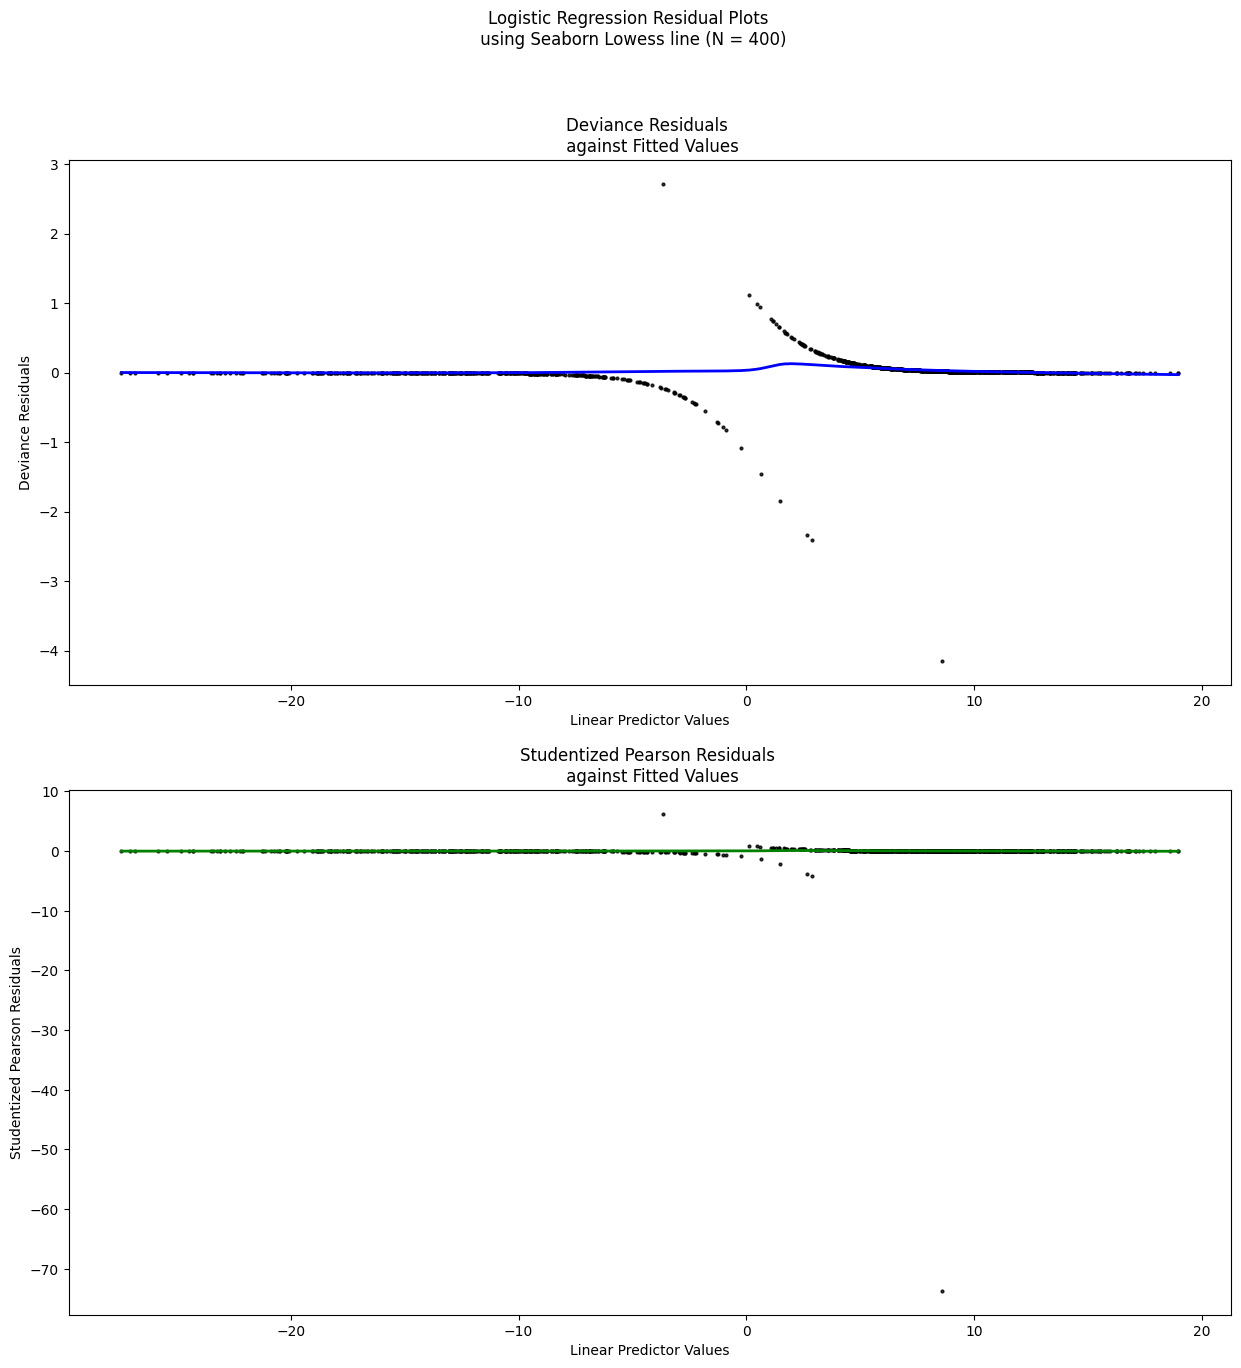

In [135]:
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")


# Deviance Residuals
sns.regplot(x=reg_log4.fittedvalues, y=reg_log4.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 4},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(x=reg_log4.fittedvalues, y=reg_log4.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 4},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

### 5.1.2 Application du modèle de regression logistique à nos données

In [136]:
X_test_scale_df = pd.DataFrame(data = X_test_scale, index=X_test.index, columns=X_test.columns)


# Prédiction des données de test
yhat2 = reg_log4.predict(X_test_scale_df)

In [137]:
prediction = list(map(round, yhat2))

In [138]:
# Evaluation des predictions
acc = accuracy_score(y_test, prediction)
print('Accuracy: %.3f' % acc)
print("Accuracy (train) : %0.1f%% " % (acc * 100))

Accuracy: 0.990
Accuracy (train) : 99.0% 


In [139]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Precision : Fraction des prédictions positives correctes / total des prédictions positives  
- sur le total des billets prédits comme faux, 97% le sont vraiment
- sur le total des billets prédits comme vrai, 99% le sont vraiment  
  
Recall : Fraction des prédictions positives correctes / total des positifs réels  
- pour tous les billets faux, le modèle a prédit correctement cette qualité pour 98% d'entre eux  
- pour tous les billets vrai, le modèle a prédit correctement cette qualité pour 98% d'entre eux


In [140]:
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[ 98   2]
 [  1 199]]


In [141]:
cmn = confusion_matrix(y_test, prediction, normalize='true') 
print ("Confusion Matrix : \n", cmn) 

Confusion Matrix : 
 [[0.98  0.02 ]
 [0.005 0.995]]


## 5.2 Regression logistique avec sklearn

### 5.2.1 Application d'un modèle de regression logistique sklearn à nos données

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logistic = LogisticRegression(solver='saga')
logistic.fit(X_train_scale, y_train)

LogisticRegression(solver='saga')

Le 'solver' est l'algorithme qui va permettre de comprendre quel modèle utiliser dans les données.

In [144]:
pred_log = logistic.predict(X_test_scale)

In [145]:
prob_log = logistic.predict_proba(X_test_scale).round(2)

In [146]:
conf_log = confusion_matrix(y_test, pred_log) 
print ("Confusion Matrix : \n", conf_log) 

Confusion Matrix : 
 [[ 97   3]
 [  1 199]]


### 5.2.2 Recherche d'optimisation du modèle de regression logistique sklearn

L'optimisation de notre modèle peut se faire avec la recherche d'hyper paramètres.  
Parmi ces paramètres figurent :  
- solver : algorithme utilisé lors de l'entrainement.
- penalty : coefficient de régularisation (de niveau 1 ou 2). La régularisation  l2 permet d'éviter le sur-apprentissage (amplitude restreinte des poids affectés aux variables) tandis que la régularisation l1 permet d'obtenir un modèle parcimonieux (sélection des variables).
- C : valeur numérique avec des échelles logarithmique.  
  
A noter que ces différents paramètres sont parfois incompatibles entre eux. Par exemple, le solver 'liblinear' n'est pas compatible avec la penalty l2. Ce qui explique certains messages d'erreurs lors du grid.fit.


In [147]:
logit1 = LogisticRegression()
params = { 'C' : np.logspace(-3, 3 , 7),
         'penalty' : ['l1','l2'],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

In [148]:
# GridSearchCV

GridSearchCV est une fonction qui permet d'effectuer une recherche de ces hyper-paramètres.  
L'argument cv est le nombre de partitions différentes réalisées lors de l'entrainement.  
L'argument n_jobs = -1 force la GridSearch à travailler sur l'ensemble des CPU.

In [149]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(logit1, params, cv=10,n_jobs=-1, return_train_score=True,verbose=1)
grid.fit(X_train_scale, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


C:\Users\kant_\anaconda3\envs\Quentin\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kant_\anaconda3\envs\Quentin\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kant_\anaconda3\envs\Quentin\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kant_\anaconda3\envs\Quentin\lib\site-packages\sklearn\linear_model\_logistic.py",

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             return_train_score=True, verbose=1)

In [150]:
best_params = grid.best_params_
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [151]:
# Résultats de la Gridsearch

res = grid.cv_results_

In [152]:
res = pd.DataFrame(res)

In [153]:
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'param_solver',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [154]:
res = res[cols]
res = res.sort_values("rank_test_score")

In [155]:
def resultize(grid) :
    
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    
    return res

In [156]:
# Application des meilleurs hyper paramètres à notre modèle

logit1 = LogisticRegression(**best_params)
logit1.fit(X_train_scale, y_train)
logit1_pred = logit1.predict(X_test_scale)

In [157]:
conf_logit1 = confusion_matrix(y_test, logit1_pred) 
print ("Confusion Matrix : \n", conf_logit1) 

Confusion Matrix : 
 [[ 97   3]
 [  1 199]]


Le nouveau modèle de régression logistique donne un résultat équivalent.

In [158]:
# Evaluation des predictions
acc = accuracy_score(y_test, logit1_pred)
print('Accuracy: %.3f' % acc)
print("Accuracy (train) : %0.1f%% " % (acc * 100))

Accuracy: 0.987
Accuracy (train) : 98.7% 


In [159]:
print(classification_report(y_test, logit1_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



Precision : Fraction des prédictions positives correctes / total des prédictions positives  
- sur le total des billets prédits comme faux, 99% le sont vraiment
- sur le total des billets prédits comme vrai, 99% le sont vraiment  
  
Recall : Fraction des prédictions positives correctes / total des positifs réels  
- pour tous les billets faux, le modèle a prédit correctement cette qualité pour 97% d'entre eux  
- pour tous les billets vrai, le modèle a prédit correctement cette qualité pour 99% d'entre eux

# Annexes

# 6. k-NN

k Nearest Neighbors est un algorithme d'apprentissage supervisé qui peut servir autant pour la classification que pour la régression (non linéaire). Il est surnommé « nearest neighbors » (plus proches voisins) car le principe de ce modèle consiste en effet à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.

Nous utiliserons ici KNeighborsClassifier, car nous cherchons à prédire une catégorie Vrai/Faux. Dans le cas de prédictions de valeurs numériques, l'utilisation de KneighborsRegressor aurait été plus adaptée.

## 6.1 Choix du nombre de k voisins pour la prédiction

Afin de trouver la meilleure valeur de k, plusieurs méthodes peuvent être employées.

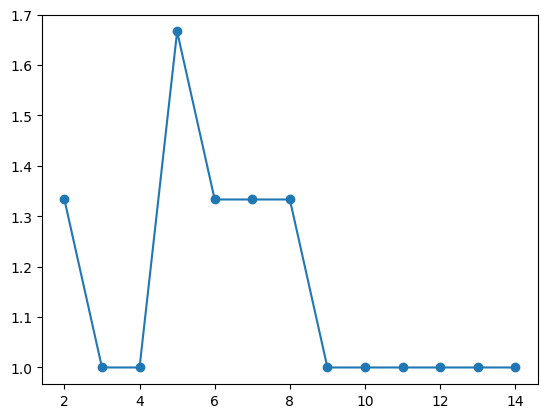

In [160]:
from sklearn import neighbors

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_scale, y_train).score(X_test_scale, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

Afin de produire ce graphique, nous devons connaitre X_train et X_test. Nous pouvons également utiliser l'outil GridSeachCV qui s'applique seulement sur les données d'entrainement.

In [161]:
estimator = neighbors.KNeighborsClassifier()

params_knn = {'n_neighbors':  range(1, 15, 1),
    'p': [1,2],
    'weights': ['uniform', 'distance']}

grid2 = GridSearchCV(
    estimator=estimator,
    param_grid=params_knn,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1)

grid2.fit(X_train_scale, y_train)
print(grid2.best_params_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


En pratique, plusieurs associations différentes de paramètres peuvent donner des résultats similaires.

## 6.2 Application du k-NN à nos données

In [162]:
knn = neighbors.KNeighborsClassifier(n_neighbors=8, p=2, weights = 'uniform')
model_knn = knn.fit(X_train_scale, y_train)

In [163]:
predictKNN  = model_knn.predict(X_test_scale)

In [164]:
# Evaluation des predictions
acc = accuracy_score(y_test, predictKNN)
print('Accuracy: %.3f' % acc)
print("Accuracy (train) : %0.1f%% " % (acc * 100))

Accuracy: 0.987
Accuracy (train) : 98.7% 


In [165]:
print(classification_report(y_test, predictKNN))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



In [166]:
# confusion matrix
cm2 = confusion_matrix(y_test, predictKNN) 
print ("Confusion Matrix : \n", cm2)

Confusion Matrix : 
 [[ 97   3]
 [  1 199]]


In [167]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=3)
model_knn2 = knn2.fit(X_train_scale, y_train)

In [168]:
predictKNN2  = model_knn2.predict(X_test_scale)

In [169]:
# confusion matrix
cm22 = confusion_matrix(y_test, predictKNN2) 
print ("Confusion Matrix : \n", cm22) 

Confusion Matrix : 
 [[ 97   3]
 [  0 200]]


Cette méthode semble particulièrement intéressante afin d'effectuer une prédiction correcte sur les vrais billets.

Même s'il donne de bons résultats dans le cadre de notre échantillon de données, k-NN est un algorithme très gourmand en puissance de calcul (CPU) et en mémoire (stockage RAM). Il devient donc impraticable avec des ensemble de données très fournis.

# 7. SVM (Machine à Vecteur de Support - Séparatrice à Vaste Marge)

Le SVM est un algorithme d'apprentissage supervisé qui peut servir autant pour la classification (linéaire ou non linéaire) que pour la régression ou même la détection des outliers. Leur haut degré de précision est un avantage par rapport aux autres algorithme de classification (tels que k-NN). Il est égazlement très bien adapté pour les ensembles de données de grande dimension.

Les SVM visent à délimiter de bonnes frontières entre deux ensembles de points appartenant à deux catégories différentes.  

La frontière de décision s'exprime sous la forme d'un hyperplan. L'hyperplan de séparation est calculé en maximisant la distance entre l'hyperplan et les points de données les plus proches de chaque classe.

## 7.1 Choix des meilleurs hyper paramètres pour SVM

SVM est livré avec de nombreux hyper-paramètres. Nous allons nous concentrer sur les 3 principaux :  
- C = régularisation de l'erreur. Ce paramètre régule le degré de souplesse d'une marge (arbitrage entre faiblesse de la marge et nombre d'erreurs de classification).  
- kernel = fonction utilisée pour transformer l'ensemble de données  
- gamma = degré d'ajustement du modèle aux données d'entraînement. L'utilisation d'un gamma plus petit peut signifier qu'un modèle est plus généralisé. Inversement, plus la valeur de gamma est élevée, plus le modèle risque d'être surajusté aux données d'apprentissage.

In [170]:
# A l'aide de la GridSearchCV

In [171]:
from sklearn.svm import SVC

estimator = SVC()

params_SVC = {'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear','poly']}

grid3 = GridSearchCV(
    estimator=estimator,
    param_grid=params_SVC,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=2)

grid3.fit(X_train_scale, y_train)
print(grid3.best_params_)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [172]:
resultize(grid3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
36,0.006150,0.000710,0.001503,0.000500,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.994167,5.335937e-03,1,0.994167,5.928819e-04
64,0.140655,0.030865,0.000464,0.000488,1000,0.1,linear,"{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}",0.993333,6.236096e-03,2,0.994537,8.735168e-04
67,0.135543,0.034622,0.000901,0.000540,1000,0.01,linear,"{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}",0.993333,6.236096e-03,2,0.994537,8.735168e-04
58,0.026404,0.008021,0.000800,0.000400,100,0.0001,linear,"{'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}",0.993333,6.236096e-03,2,0.994444,9.259259e-04
49,0.027005,0.008347,0.000651,0.000551,100,0.1,linear,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",0.993333,6.236096e-03,2,0.994444,9.259259e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.046959,0.003520,0.012504,0.000779,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.666667,1.110223e-16,61,0.666667,1.110223e-16
71,0.034842,0.007367,0.003961,0.000953,1000,0.001,poly,"{'C': 1000, 'gamma': 0.001, 'kernel': 'poly'}",0.666667,1.110223e-16,61,0.666667,1.110223e-16
8,0.040000,0.001266,0.004402,0.000492,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.666667,1.110223e-16,61,0.666667,1.110223e-16
56,0.040936,0.001369,0.004153,0.000322,100,0.001,poly,"{'C': 100, 'gamma': 0.001, 'kernel': 'poly'}",0.666667,1.110223e-16,61,0.666667,1.110223e-16


## 7.2 Application du SVM à nos données

In [173]:
svm = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
svm.fit(X_train_scale, y_train)

SVC(C=10, gamma=0.01)

In [174]:
pred_svm = svm.predict(X_test_scale)

In [175]:
conf_svm = confusion_matrix(y_test, pred_svm) 
print ("Confusion Matrix : \n", conf_svm) 

Confusion Matrix : 
 [[ 97   3]
 [  2 198]]


In [176]:
svm1 = SVC(C= 1000, gamma= 0.1, kernel= 'linear')
svm1.fit(X_train_scale, y_train)

SVC(C=1000, gamma=0.1, kernel='linear')

In [177]:
pred_svm1 = svm1.predict(X_test_scale)

In [178]:
conf_svm1 = confusion_matrix(y_test, pred_svm1) 
print ("Confusion Matrix : \n", conf_svm1) 

Confusion Matrix : 
 [[ 98   2]
 [  1 199]]


## 7.3 Représentation graphique de notre SVM (linéaire) en 2D

In [179]:
pca1 = decomposition.PCA(n_components=2)
X_train_projected = pca1.fit_transform(X_train_scale)
X_test_projected = pca1.fit_transform(X_test_scale)

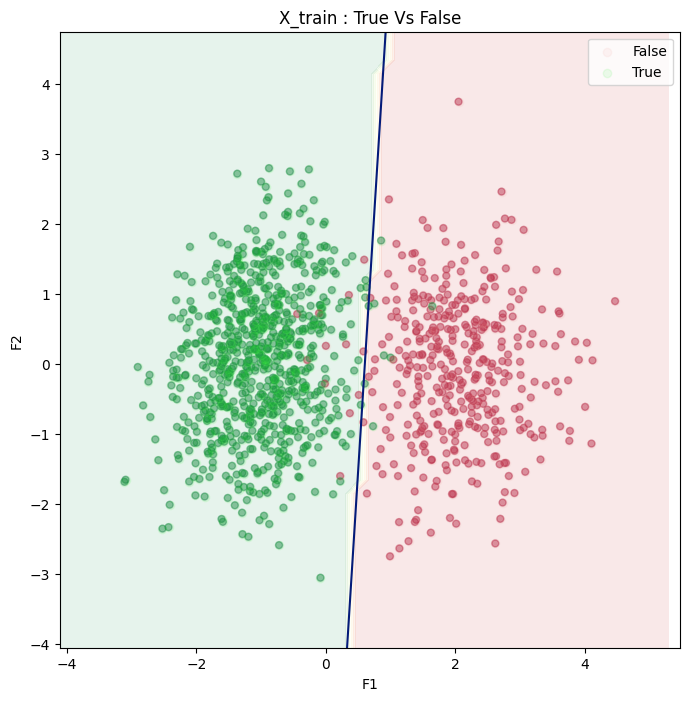

In [180]:
from matplotlib.colors import ListedColormap

# Affichage de la SVM sur les données d'entrainement réduites à 2 composantes principales

X = X_train_projected
Y = y_train

fig, ax = plt.subplots(figsize =(8, 8))
clf2 = SVC(C= 1000, gamma= 0.1, kernel= 'linear').fit(X, Y)

# Hyperplan
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# Meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
g1 = ax.contourf(xx2, yy2, Z, cmap='RdYlGn', alpha=0.1)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdYlGn', s=25, alpha=.4)
g2 = ax.plot(xx,yy, color ='#041B79')

ax.axis([x_min, x_max,y_min, y_max])

# Nuage de points
for i, j in enumerate(np.unique(Y)):
    plt.scatter(X[Y == j, 0], X[Y == j, 1], color = ListedColormap(('#F7ABA6', '#49F74A'))(i), label = j, alpha=0.1)
    
plt.title('X_train : True Vs False')
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.show()

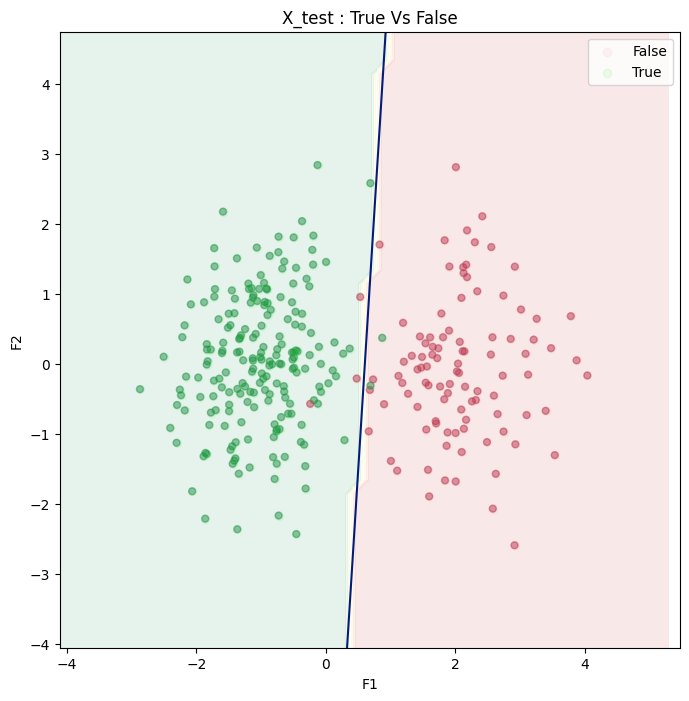

In [181]:
# Affichage de la SVM sur les données de test

X1 = X_test_projected
Y1 = y_test

fig, ax = plt.subplots(figsize =(8, 8))
ax.contourf(xx2, yy2, Z, cmap='RdYlGn', alpha=0.1)
ax.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap='RdYlGn', s=25, alpha=.4)
ax.plot(xx,yy, color ='#041B79')
ax.axis([x_min, x_max,y_min, y_max])

for i, j in enumerate(np.unique(Y1)):
    plt.scatter(X1[Y1 == j, 0], X1[Y1 == j, 1], color = ListedColormap(('#F7ABA6', '#49F74A'))(i), label = j, alpha=0.1)
    
plt.title('X_test : True Vs False')
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.show()

# 8. Gaussian Naive Bayes

Naive Bayes est un modèle de classification probabiliste basique mais efficace en apprentissage automatique qui s'inspire du théorème de Bayes. Il suppose que les prédicteurs contribuent de manière égale et indépendante à la sélection de la classe de sortie. 

L'algorithme Gaussian Naive Bayes est un type d'algorithme Naive Bayes. Il est spécifiquement utilisé lorsque les caractéristiques ont des valeurs continues. Il suppose que toutes les caractéristiques suivent une distribution normale.

Cet algorithme est particulièrement bien adapté lorsque l'hypothèse d'indépendance des prédicteurs est vérifiée et pour le traitement des grands ensembles de données.

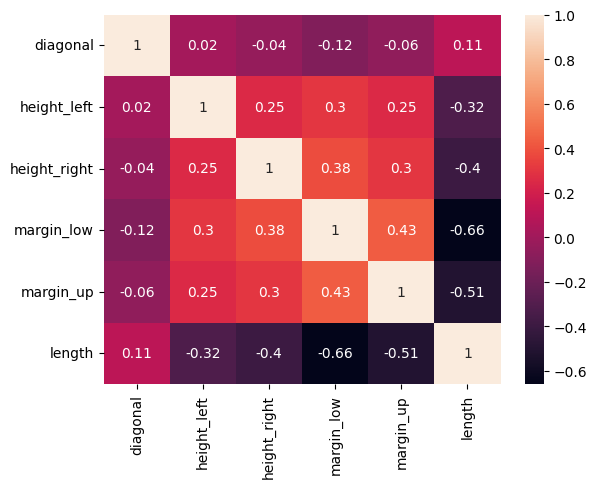

In [182]:
correlation_matrix1 = X_train.corr().round(2)
sns.heatmap(data=correlation_matrix1, annot=True)
plt.show()

Ici 'length' est la seule variable a avoir une correlation assez marquée avec d'autres variables (corrélation négative avec 'margin_low' -0.66). Dans les faits, l'indépendance complète entre variables se vérifie rarement. L'utilisation de cet algorithme peut être appropriée dans notre cas.

In [183]:
billets_base1 = billets_base.drop(columns='is_genuine')

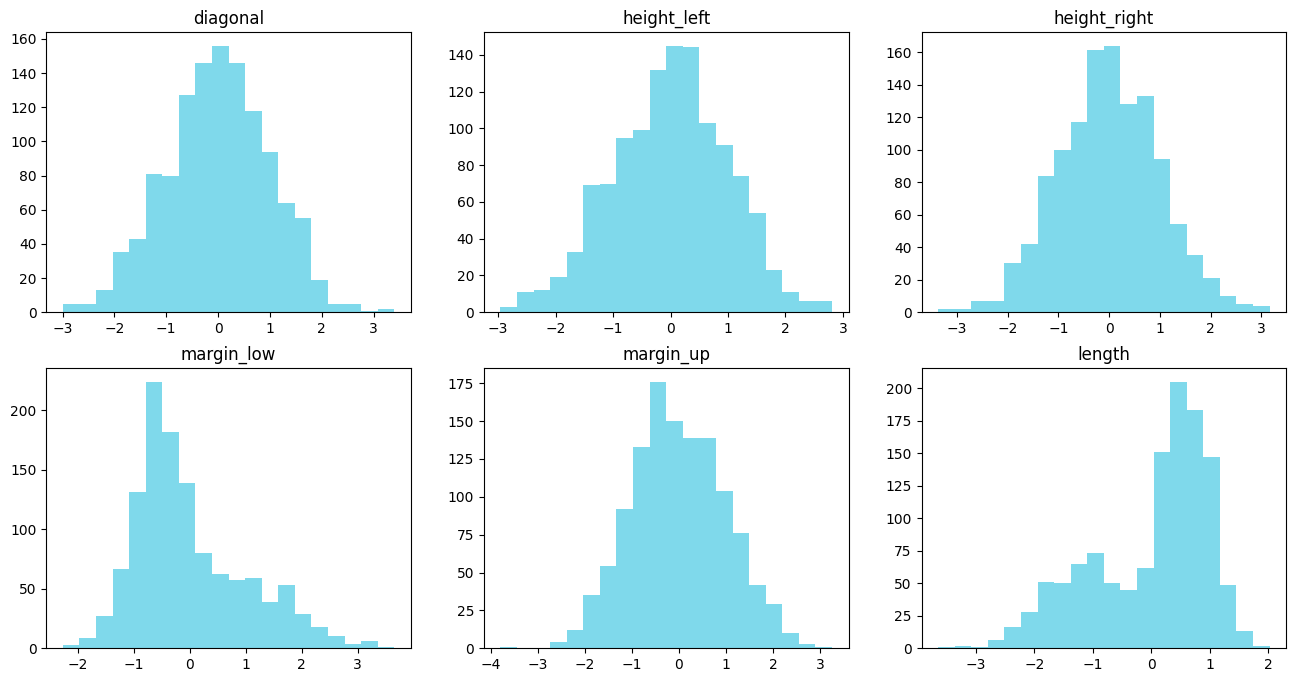

In [184]:
# Histogramme de variables
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 8))

ax1.hist(billets_base1['diagonal'],bins=20, color='#00b4d8', alpha =0.5)
ax1.set_title("diagonal")
ax2.hist(billets_base1['height_left'],bins=20, color='#00b4d8', alpha =0.5)
ax2.set_title("height_left")
ax3.hist(billets_base1['height_right'],bins=20, color='#00b4d8', alpha =0.5)
ax3.set_title("height_right")
ax4.hist(billets_base1['margin_low'],bins=20, color='#00b4d8', alpha =0.5)
ax4.set_title("margin_low")
ax5.hist(billets_base1['margin_up'],bins=20, color='#00b4d8', alpha =0.5)
ax5.set_title("margin_up")
ax6.hist(billets_base1['length'],bins=20, color='#00b4d8', alpha =0.5)
ax6.set_title("length")
plt.show()

In [185]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scale, y_train)

GaussianNB()

In [186]:
nb = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(
    estimator=nb,
    param_grid=params_NB,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1)

grid.fit(X_train_scale, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.12328467394420659}


In [187]:
nb1 = GaussianNB(var_smoothing = 0.12328467394420659)
nb1.fit(X_train_scale, y_train)

GaussianNB(var_smoothing=0.12328467394420659)

In [188]:
pred_nb = nb1.predict(X_test_scale)

In [189]:
conf_nb = confusion_matrix(y_test, pred_nb) 
print ("Confusion Matrix : \n", conf_nb) 

Confusion Matrix : 
 [[ 97   3]
 [  1 199]]


# 9. Forêt aléatoire (Random Forest)

C'est un algorithme d'apprentissage automatique supervisé utlisé pour la classification et la régression. Dans cette technique, plusieurs arbres de décision sont créés à partir de divers sous-échantillons des données d'apprentissage et la sortie majoritaire de ces arbres est sélectionnée. Cet algorithme :  
- bénéficie d'une très grande précision  
- est adapté pour gérer de grands ensembles de données  
- permet d'éviter le surajustement (aléatoire)  
- peut poser des problèmes d'interprétation

Quelques hyperparamètres :  
- n_estimators = nombre d'arbres de décisions construits.
- criterion = qualité de scission des arbres de décision (impuretés de Gini ou gain d'information - entropy)
- max_features = max de fonctionnalités à prendre en compte lors de la recherche de la meilleure répartition  
- class_weight = poids associés aux classes

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params_RF = {'criterion': ['gini', 'entropy'], 
    'n_estimators': [100, 150],
    'max_depth': [30, 50],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 3],
    'class_weight': ['balanced', 'balanced_subsample']}

grid = GridSearchCV(
    estimator=rf,
    param_grid=params_RF,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1)

grid.fit(X_train_scale, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9933333333333334


In [191]:
rf1 = RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy', max_depth= 30, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 100)
rf1.fit(X_train_scale, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, min_samples_split=3)

In [192]:
pred_rf = rf1.predict(X_test_scale)

In [193]:
conf_rf = confusion_matrix(y_test, pred_rf) 
print ("Confusion Matrix : \n", conf_rf) 

Confusion Matrix : 
 [[ 97   3]
 [  2 198]]


# 10. Comparaison des différents algorithmes de classification

# 10.1 Affichage rapide des scores par classifier

In [194]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = {
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "LogisticRegr" : LogisticRegression()
}

In [195]:
# Start timing the models above
from time import time
nfast = 14      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train_scale, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test_scale, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

KNN(3)         | score = 0.990 | time = 0.002s/0.007s
RBF SVM        | score = 0.953 | time = 0.049s/0.018s
Decision Tree  | score = 0.980 | time = 0.002s/0.000s
Random Forest  | score = 0.980 | time = 0.016s/0.001s
Neural Net     | score = 0.987 | time = 0.465s/0.000s
AdaBoost       | score = 0.983 | time = 0.080s/0.007s
Naive Bayes    | score = 0.987 | time = 0.000s/0.001s
QDA            | score = 0.987 | time = 0.000s/0.001s
Linear SVC     | score = 0.983 | time = 0.001s/0.000s
Linear SVM     | score = 0.987 | time = 0.006s/0.000s
Gaussian Proc  | score = 0.983 | time = 9.020s/0.010s
LogisticRegr   | score = 0.987 | time = 0.004s/0.000s


## 10.2 Matrices de confusion pour quelques classifiers

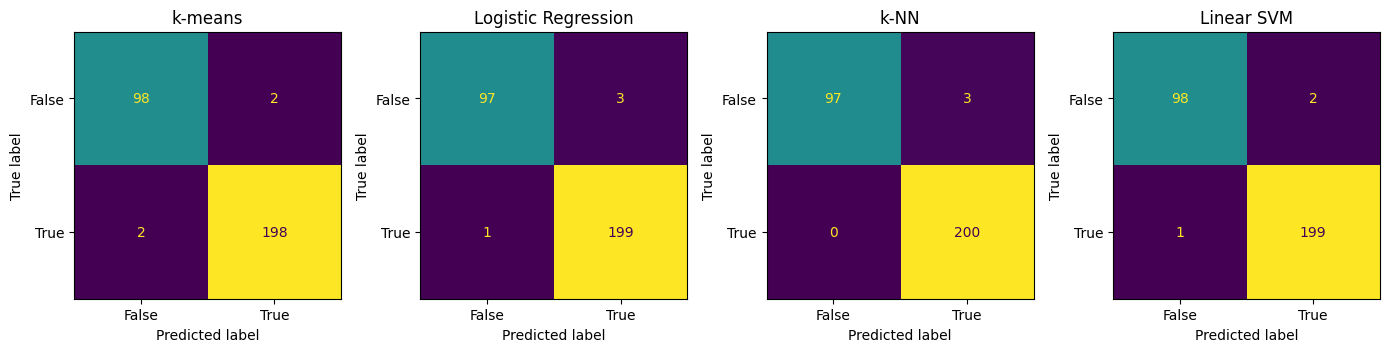

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay

predictionss = [yhat, logit1_pred, predictKNN2, pred_svm1]
names = ['k-means', 'Logistic Regression', 'k-NN', 'Linear SVM']

ncols = len(names)
fig, axes = plt.subplots(1,ncols,figsize=(14, 14))

for i,name,ax in zip(predictionss, names, axes.flatten()) :
    CMFP = ConfusionMatrixDisplay.from_predictions(y_test, i, display_labels=['False','True'], ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()

Les modèles ci-dessus présentent des résultats similaires. Le KNN semble très bien adapté pour repérer efficacement les vrais billets.

## 10.3 AUC et ROC (courbe caractéristique de fonctionnement du récepteur)

Cette courbe est essentiellement une représentation graphique des performances de tout modèle de classification à tous les seuils de classification.

L'efficacité du modèle est déterminée en observant l’aire sous la courbe (AUC). Ainsi, le modèle le plus efficace a une AUC égale à 1, et le modèle le moins efficace a une AUC égale à 0,5.

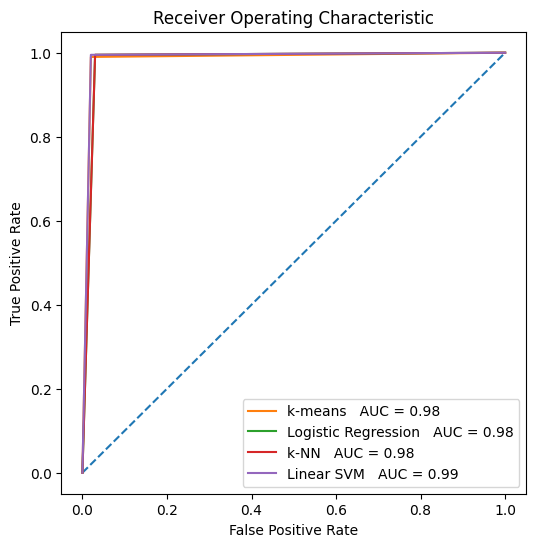

In [197]:
from sklearn.metrics import roc_curve, auc

predictionss = [yhat, logit1_pred, predictKNN, pred_svm1]
names = ['k-means', 'Logistic Regression', 'k-NN', 'Linear SVM']

plt.figure(figsize = (6,6))
plt.title('Receiver Operating Characteristic')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for j, name in zip(predictionss, names) :
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, j)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate,true_positive_rate, label= '{}   AUC = %0.2f'.format(name) % roc_auc)
    plt.legend(loc = 'lower right')

plt.show()

Globalement tous nos modèles sont très efficaces : AUC > 0.97

# 11. Récap détection de faux billets

In [198]:
dimensions = ['diagonal','height_left','height_right','margin_low', 'margin_up','length']
X = billets_final1.loc[:, dimensions]
y = billets_final1['is_genuine']

# Fractionnement des données
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = .8, shuffle=True, stratify = y)

In [199]:
scaler = StandardScaler()

In [200]:
X_train_scaled = scaler.fit_transform(X_train)

In [201]:
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [202]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [211]:
file = r"C:\Users\kant_\Downloads/billets_test.csv"

In [212]:
def detection(n) :
    
    fichier = pd.read_csv(n)
    fichier.set_index('id', inplace=True)
    fichier['is_genuine'] = classifier.predict(scaler.transform(fichier))
    fichier['proba'] = classifier.predict_proba(scaler.transform(fichier.drop(columns=['is_genuine'],axis=1)))[:,1].round(3)
                                                                    
    return fichier

In [213]:
detection(file)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,proba
id,,,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19,True,0.973
B_2,171.52,104.17,104.03,5.27,3.16,111.82,False,0.013
B_3,171.78,103.80,103.75,3.81,3.24,113.39,True,0.996
B_4,172.02,104.08,103.99,5.57,3.30,111.10,False,0.000
B_5,171.79,104.34,104.37,5.00,3.07,111.87,False,0.032
